# 📘 Exploratory Data Analysis of Programming Languages
### Author: Luis Modesto  
### Dataset: Enriched Programming Languages Dataset  
### Last updated: YYYY-MM-DD

---

# 1. Introduction
- Purpose of the analysis  
- Overview of the dataset  
- Key questions we want to answer:
  - How have programming languages evolved over time?
  - Which paradigms dominate different eras?
  - How do typing disciplines correlate with popularity?
  - What geographic and organizational patterns exist?
  - How do languages influence each other?


In [1]:
# 2. Setup
## 2.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import pycountry_convert as pc

In [2]:
# 2.2 Load dataset
df = pd.read_csv("C:\\Users\\lmode\\Downloads\\df_lang.csv")
df.head()

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,file_extensions,popularity
0,Python,Guido van Rossum,1991,Object-oriented,Dynamic; Strong,Individual,Netherlands,General-purpose; Data science,ABC; Modula-3; C,35,.py,1
1,JavaScript,Brendan Eich,1995,Functional,Dynamic; Weak,Corporate,United States,Web development,Scheme; Java; Self,31,.js,6
2,Java,James Gosling,1995,Object-oriented,Static; Strong,Corporate,United States,Enterprise; Backend,C++; Smalltalk,31,.java,3
3,C,Dennis Ritchie,1972,Procedural,Static; Weak,Corporate,United States,Systems programming,B; BCPL,54,.c,2
4,C++,Bjarne Stroustrup,1985,Object-oriented,Static; Strong,Corporate,United States,Systems programming,C; Simula,41,.cpp,4


In [3]:
# 2.3 Basic configuration
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
# 3. Data Overview
# 3.1 Shape and basic info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   language           100 non-null    object
 1   founder/creator    100 non-null    object
 2   year               100 non-null    int64 
 3   primary_paradigm   100 non-null    object
 4   typing_discipline  98 non-null     object
 5   origin_type        100 non-null    object
 6   country            100 non-null    object
 7   primary_use_case   100 non-null    object
 8   influenced_by      98 non-null     object
 9   age                100 non-null    int64 
 10  file_extensions    100 non-null    object
 11  popularity         100 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 9.5+ KB


In [5]:
# 3.2 Summary statistics
df.describe(include='all')

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,file_extensions,popularity
count,100,100,100.000000,100,98,100,100,100,98,100.000000,100,100.000000
unique,100,96,NaN,15,13,5,14,43,48,NaN,48,NaN
top,Python,Microsoft,NaN,Functional,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
freq,1,4,NaN,21,51,51,51,51,51,NaN,51,NaN
mean,NaN,NaN,1996.220000,NaN,NaN,NaN,NaN,NaN,NaN,29.780000,NaN,10.760000
std,NaN,NaN,17.765919,NaN,NaN,NaN,NaN,NaN,NaN,17.765919,NaN,15.248196
min,NaN,NaN,1949.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000
25%,NaN,NaN,1984.750000,NaN,NaN,NaN,NaN,NaN,NaN,14.750000,NaN,0.000000
50%,NaN,NaN,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000
75%,NaN,NaN,2011.250000,NaN,NaN,NaN,NaN,NaN,NaN,41.250000,NaN,20.250000


In [6]:
# 3.3 Missing values
df.isna().sum()

language             0
founder/creator      0
year                 0
primary_paradigm     0
typing_discipline    2
origin_type          0
country              0
primary_use_case     0
influenced_by        2
age                  0
file_extensions      0
popularity           0
dtype: int64

In [7]:
# 4. Data Cleansing & Feature Engineerings
# 4.1 Normalize categorical fields
# Clean whitespace and split into lists
df['paradigm_list'] = (
    df['primary_paradigm']
    .str.split(";")
    .apply(lambda lst: [x.strip() for x in lst])
)

# Extract primary paradigm (first in list)
df['primary_paradigm'] = df['paradigm_list'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Optimal: one-hot encode paradigms
paradigm_dummies = df['paradigm_list'].explode().str.get_dummies().groupby(level=0).sum()
df = pd.concat([df, paradigm_dummies], axis=1)

In [8]:
df = df.fillna("")

In [9]:
# Standardize typing discipline
# Normalize formatting
df["typing_discipline"] = (
    df["typing_discipline"]
    .str.lower()
    .str.replace(";", ",")
    .str.replace("/", ",")
    .str.replace("  ", " ")
    .str.strip()
)

# Extract static/dynamic
df["typing_time"] = df["typing_discipline"].apply(
    lambda x: "static" if "static" in x else ("dynamic" if "dynamic" in x else None)
)

# Extract strong/weak
df["typing_strength"] = df["typing_discipline"].apply(
    lambda x: "strong" if "strong" in x else ("weak" if "weak" in x else None)
)

# Capitalize for presentation
df["typing_time"] = df["typing_time"].str.title()
df["typing_strength"] = df["typing_strength"].str.title()

In [10]:
# Normalize base formatting
df["country"] = df["country"].str.lower().str.strip()

# Replace common variants
country_map = {
    "usa": "United States",
    "u.s.a.": "United States",
    "us": "United States",
    "united states of america": "United States",
    "uk": "United Kingdom",
    "england": "United Kingdom",
    "russia": "Russian Federation",
    "south korea": "South Korea",
    "korea": "South Korea",
    "unknown": None,
}

df["country"] = df["country"].replace(country_map)

# Title-case final output
df["country"] = df["country"].str.title()

In [11]:
df["primary_paradigm"].unique()
df["typing_time"].value_counts()
df["typing_strength"].value_counts()
df["country"].value_counts().head(20)

country
United States         33
Canada                 2
United Kingdom         2
Brazil                 2
Switzerland            2
Japan                  1
Russian Federation     1
Netherlands            1
New Zealand            1
Sweden                 1
France                 1
Argentina              1
Germany                1
Name: count, dtype: int64

In [12]:
df['decade'] = (df['year']//10)*10

In [13]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 10, 20, 30, 40, 50, 100],
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
)

In [14]:
df['paradigm_count'] = df['paradigm_list'].apply(len)

In [15]:
df['is_multi_paradigm'] = df['paradigm_count']>1

In [16]:
paradigm_map = {
    "Object-oriented": "OOP",
    "Functional": "Functional",
    "Procedural": "Procedural",
    "Logic": "Logic",
    "Declarative": "Declarative",
    "Scripting": "Scripting",
    "Array": "Array",
    "Contract-oriented": "Blockchain",
    "Visual": "Visual",
    "Stack-based": "Stack-based",
    "Hardware description": "HDL"
}

df["paradigm_family"] = df["primary_paradigm"].map(paradigm_map)

In [17]:
df["typing_category"] = df["typing_time"].fillna("") + " " + df["typing_strength"].fillna("")
df["typing_category"] = df["typing_category"].str.strip()

In [18]:
df["is_static"] = df["typing_time"] == "static"
df["is_dynamic"] = df["typing_time"] == "dynamic"

In [19]:
df["origin_category"] = df["origin_type"].replace({
    "Corporate": "Corporate",
    "Academic": "Academic",
    "Individual": "Individual",
    "Community": "Community"
})


In [20]:
df["is_corporate"] = df["origin_category"] == "Corporate"

In [21]:
def country_to_continent(country):
    try:
        code = pc.country_name_to_country_alpha2(country)
        continent = pc.country_alpha2_to_continent_code(code)
        return continent
    except:
        return None

df["continent"] = df["country"].apply(country_to_continent)

In [22]:
df["influence_count"] = df["influenced_by"].apply(
    lambda x: len([i.strip() for i in x.split(";")]) if isinstance(x, str) and x else 0
)


In [23]:
df["influenced_by_C"] = df["influenced_by"].str.contains("C", case=False, na=False)

In [24]:
df["influenced_others"] = df["language"].apply(
    lambda lang: df["influenced_by"].str.contains(lang, na=False).sum()
)


C:\Users\lmode\AppData\Local\Temp\ipykernel_19460\2976074920.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lambda lang: df["influenced_by"].str.contains(lang, na=False).sum()


In [25]:
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
df.dtypes

language                  object
founder/creator           object
year                       int64
primary_paradigm          object
typing_discipline         object
origin_type               object
country                   object
primary_use_case          object
influenced_by             object
age                        int64
file_extensions           object
popularity                 int64
paradigm_list             object
Array                      int64
Contract-oriented          int64
Declarative                int64
Functional                 int64
Hardware Description       int64
Logic                      int64
Multi-paradigm             int64
Multi‑paradigm             int64
Object-oriented            int64
Object‑oriented            int64
Procedural                 int64
Scripting                  int64
Statistical                int64
Unknown                    int64
Visual                     int64
typing_time               object
typing_strength           object
decade    

In [48]:
df["popularity"] = df["popularity"].replace(0, np.nan)

df["popularity_group"] = pd.qcut(
    df["popularity"],
    q=4,
    labels=["Low", "Medium", "High", "Top"],
    duplicates="drop"
)



In [49]:
df["popularity_per_year"] = df["popularity"] / df["age"].replace(0, 1)

In [50]:
df["extension_count"] = df["file_extensions"].apply(
    lambda x: len([e.strip() for e in x.split(",")]) if isinstance(x, str) else 0
)


In [51]:
df["modernity_score"] = (
    (df["age"] < 20).astype(int) +
    (df["typing_time"] == "Static").astype(int) +
    (df["paradigm_count"] > 1).astype(int)
)


In [52]:
df["complexity_score"] = (
    df["paradigm_count"] +
    df["influence_count"] +
    (df["typing_strength"] == "Strong").astype(int)
)

In [53]:
df["popularity"].duplicated().sum()

np.int64(54)

In [54]:
df["popularity"] = df["popularity"].fillna(0)

In [55]:
df["language"].duplicated().sum()

np.int64(0)

In [56]:
df[df["language"].duplicated(keep=False)].sort_values("language")

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [57]:
sorted(df["primary_paradigm"].dropna().unique())

['Array',
 'Contract-oriented',
 'Declarative',
 'Functional',
 'Hardware Description',
 'Logic',
 'Multi-paradigm',
 'Multi‑paradigm',
 'Object-oriented',
 'Object‑oriented',
 'Procedural',
 'Scripting',
 'Statistical',
 'Unknown',
 'Visual']

In [58]:
df["primary_paradigm"].value_counts()

primary_paradigm
Functional              21
Object-oriented         19
Procedural              18
Unknown                 14
Declarative              5
Object‑oriented          4
Scripting                4
Visual                   4
Hardware Description     3
Statistical              2
Multi‑paradigm           2
Logic                    1
Contract-oriented        1
Array                    1
Multi-paradigm           1
Name: count, dtype: int64

In [59]:
df[df["primary_paradigm"].str.contains("  |/", na=False)]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [60]:
df["typing_discipline"].value_counts()

typing_discipline
unknown                      51
static, strong               22
dynamic, strong               9
dynamic, weak                 5
static                        3
dynamic                       2
                              2
static (schema-based)         1
static, weak                  1
static, dynamic messaging     1
none                          1
dynamic, optional static      1
none (markup)                 1
Name: count, dtype: int64

In [61]:
df["typing_time"].value_counts()
df["typing_strength"].value_counts()

typing_strength
Strong    31
Weak       6
Name: count, dtype: int64

In [62]:
df[
    (df["typing_time"].isna()) |
    (df["typing_strength"].isna())
]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group
16,SQL,Donald D. Chamberlin & Raymond F. Boyce,1974,Declarative,static (schema-based),Corporate,United States,Databases; Query languages,Relational algebra; Relational calculus,52,...,True,NA,2,True,1,0.153846,1,1,3,Low
17,HTML/CSS,Tim Berners-Lee (HTML),1990,Declarative,none (markup),Academic,Switzerland,Web structure & styling,SGML,36,...,False,EU,1,False,0,0.916667,2,0,2,High
21,Groovy,James Strachan,2003,Object‑oriented,"dynamic, optional static",Community,United States,JVM scripting; Build tools,"Java;, Python; Ruby",23,...,False,NA,3,False,0,1.695652,1,1,4,Top
27,Assembly,Various (machine dependent),1949,Procedural,none,Corporate,United States,Systems; Embedded,Machine code,77,...,True,NA,1,True,0,0.376623,1,0,2,High
29,Objective-C,Brad Cox & Tom Love,1984,Object-oriented,"static, dynamic messaging",Corporate,United States,macOS/iOS development,C; Smalltalk,42,...,True,NA,2,True,1,0.166667,1,1,3,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Io,Steve Dekorte,2002,Object-oriented,unknown,Unknown,None,Unknown,Unknown,24,...,False,None,1,False,0,NaN,1,0,2,NaN
96,Pony,Sylvan Clebsch & others,2013,Object-oriented,unknown,Unknown,None,Unknown,Unknown,13,...,False,None,1,False,0,NaN,1,1,2,NaN
97,Gleam,Louis Pilfold,2016,Functional,unknown,Unknown,None,Unknown,Unknown,10,...,False,None,1,False,0,NaN,1,1,2,NaN
98,Odin,Bill Holden,2019,Procedural,unknown,Unknown,None,Unknown,Unknown,7,...,False,None,1,False,0,NaN,1,1,2,NaN


In [63]:
df["origin_type"].value_counts()

origin_type
Unknown       51
Corporate     27
Academic      12
Individual     8
Community      2
Name: count, dtype: int64

In [64]:
valid_origins = ["Corporate", "Academic", "Individual", "Community"]
df[~df["origin_type"].isin(valid_origins)]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group
30,Ada,Jean Ichbiah (CII Honeywell Bull),1983,Procedural,unknown,Unknown,None,Unknown,Unknown,43,...,False,None,1,False,1,NaN,1,0,2,NaN
31,Visual Basic,Microsoft,1991,Object-oriented,unknown,Unknown,None,Unknown,Unknown,35,...,False,None,1,False,1,NaN,1,0,2,NaN
34,Delphi/Object Pascal,Anders Hejlsberg,1995,Procedural,unknown,Unknown,None,Unknown,Unknown,31,...,False,None,1,False,0,NaN,1,0,2,NaN
37,Lisp,John McCarthy,1958,Functional,unknown,Unknown,None,Unknown,Unknown,68,...,False,None,1,False,5,NaN,1,0,2,NaN
38,Prolog,Alain Colmerauer,1972,Logic,unknown,Unknown,None,Unknown,Unknown,54,...,False,None,1,False,1,NaN,1,0,2,NaN
41,Nim,Andreas Rumpf,2008,Unknown,unknown,Unknown,None,Unknown,Unknown,18,...,False,None,1,False,0,NaN,1,1,2,NaN
42,Zig,Andrew Kelley,2016,Unknown,unknown,Unknown,None,Unknown,Unknown,10,...,False,None,1,False,0,NaN,1,1,2,NaN
43,V,Alexander Medvednikov,2019,Unknown,unknown,Unknown,None,Unknown,Unknown,7,...,False,None,1,False,2,NaN,1,1,2,NaN
50,PowerShell,Microsoft (Jeffrey Snover),2006,Scripting,unknown,Unknown,None,Unknown,Unknown,20,...,False,None,1,False,0,NaN,1,0,2,NaN
51,Bash/Shell,Brian Fox (for Bash),1989,Scripting,unknown,Unknown,None,Unknown,Unknown,37,...,False,None,1,False,0,NaN,1,0,2,NaN


In [65]:
sorted(df["country"].dropna().unique())

['Argentina',
 'Brazil',
 'Canada',
 'France',
 'Germany',
 'Japan',
 'Netherlands',
 'New Zealand',
 'Russian Federation',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [66]:
df[df["country"].str.len() < 3]  # too short

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [67]:
mask_contains = df["country"].fillna("").astype(str).str.contains("[a-z]{2,}", regex=True)
mask_not_title = ~df["country"].fillna("").astype(str).str.istitle()

df[mask_contains & mask_not_title]


,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [68]:
sorted(df["primary_use_case"].dropna().unique())

['AI; High‑performance computing',
 'Academic; Functional programming',
 'Backend; Functional programming',
 'Big data; Backend',
 'Blockchain',
 'Business systems; Finance',
 'C++ successor; Systems',
 'CRM; Enterprise automation',
 'Chip design',
 'Cloud; Systems',
 'Compilers; Research',
 'Data science',
 'Databases  ',
 'Databases; Query languages',
 'Digital circuits',
 'ERP systems',
 'Education  ',
 'Education; Language research',
 'Embedded; Robotics',
 'Enterprise; Backend',
 'Enterprise; Desktop apps',
 'Finance; Data analysis',
 'Game development',
 'Game scripting',
 'General-purpose; Data science',
 'JVM scripting; Build tools',
 'Math; Finance',
 'Mobile development',
 'Mobile; Backend',
 'Numerical computing; Engineering',
 'Research; Education',
 'Scientific computing',
 'Systems programming',
 'Systems; Embedded',
 'Telecom; Distributed systems',
 'Text processing',
 'Unknown',
 'Web development',
 'Web structure & styling',
 'Web; Distributed systems',
 'Web; Mobile (

In [69]:
df[df["primary_use_case"].str.contains(";", na=False)]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group
0,Python,Guido van Rossum,1991,Object-oriented,"dynamic, strong",Individual,Netherlands,General-purpose; Data science,ABC; Modula-3; C,35,...,False,EU,3,True,4,0.028571,1,0,5,Low
2,Java,James Gosling,1995,Object-oriented,"static, strong",Corporate,United States,Enterprise; Backend,C++; Smalltalk,31,...,True,NA,2,True,9,0.096774,1,1,4,Low
5,C#,Microsoft (Anders Hejlsberg lead),2000,Object-oriented,"static, strong",Corporate,United States,Enterprise; Backend,Java; C++; Delphi,26,...,True,NA,3,True,4,0.192308,1,1,5,Low
6,Go,"Robert Griesemer, Rob Pike, Ken Thompson",2009,Procedural,"static, strong",Corporate,United States,Cloud; Systems,C; Pascal; CSP,17,...,True,NA,3,True,0,0.941176,1,2,5,Medium
10,Kotlin,JetBrains,2011,Object-oriented,"static, strong",Corporate,Russian Federation,Mobile; Backend,Java; Scala,15,...,True,EU,2,True,0,1.333333,1,2,4,Medium
15,MATLAB,Cleve Moler,1984,Procedural,"dynamic, weak",Academic,United States,Numerical computing; Engineering,Fortran; Lisp,42,...,False,NA,2,False,0,0.333333,1,0,3,Medium
16,SQL,Donald D. Chamberlin & Raymond F. Boyce,1974,Declarative,static (schema-based),Corporate,United States,Databases; Query languages,Relational algebra; Relational calculus,52,...,True,NA,2,True,1,0.153846,1,1,3,Low
18,Dart,Google (Lars Bak & Kasper Lund),2011,Object‑oriented,"static, strong",Corporate,United States,Web; Mobile (Flutter),"JavaScript, Java, C#",15,...,True,NA,1,True,0,2.000000,1,2,3,High
19,Scala,Martin Odersky,2004,Object-oriented,"static, strong",Academic,Switzerland,Big data; Backend,Java; Haskell,22,...,False,EU,2,False,1,NaN,1,1,4,NaN
21,Groovy,James Strachan,2003,Object‑oriented,"dynamic, optional static",Community,United States,JVM scripting; Build tools,"Java;, Python; Ruby",23,...,False,NA,3,False,0,1.695652,1,1,4,Top


In [70]:
df.groupby(["primary_paradigm", "typing_strength"]).size()

primary_paradigm   typing_strength
Contract-oriented  Strong              1
Functional         Strong             10
                   Weak                1
Multi‑paradigm     Strong              2
Object-oriented    Strong             11
                   Weak                2
Object‑oriented    Strong              3
Procedural         Strong              4
                   Weak                3
dtype: int64

In [71]:
df[(df["origin_type"] == "Corporate") & (df["country"].isna())]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [72]:
df[df["age"] != (2026 - df["year"])]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [73]:
df.isna().sum().sort_values(ascending=False)

typing_strength         63
popularity_group        55
popularity_per_year     55
typing_time             55
continent               51
country                 51
paradigm_family         26
language                 0
founder/creator          0
age                      0
file_extensions          0
primary_paradigm         0
year                     0
typing_discipline        0
origin_type              0
primary_use_case         0
influenced_by            0
Functional               0
Declarative              0
Contract-oriented        0
Array                    0
paradigm_list            0
popularity               0
Hardware Description     0
Logic                    0
Scripting                0
Procedural               0
Unknown                  0
Statistical              0
Object-oriented          0
Object‑oriented          0
Multi-paradigm           0
Multi‑paradigm           0
paradigm_count           0
age_group                0
decade                   0
Visual                   0
i

In [90]:
print("Duplicates:", df["language"].duplicated().sum())
print("\nMissing values:")
print(df.isna().sum())

print("\nCategory counts:")
for col in ["primary_paradigm", "typing_time", "typing_strength", "origin_type", "country"]:
    print(f"\n{col}:")
    print(df[col].value_counts())

Duplicates: 0

Missing values:
language                 0
founder/creator          0
year                     0
primary_paradigm         0
typing_discipline        0
origin_type              0
country                 51
primary_use_case         0
influenced_by            0
age                      0
file_extensions          0
popularity               0
paradigm_list            0
Array                    0
Contract-oriented        0
Declarative              0
Functional               0
Hardware Description     0
Logic                    0
Multi-paradigm           0
Multi‑paradigm           0
Object-oriented          0
Object‑oriented          0
Procedural               0
Scripting                0
Statistical              0
Unknown                  0
Visual                   0
typing_time             55
typing_strength         63
decade                   0
age_group                0
paradigm_count           0
is_multi_paradigm        0
paradigm_family         26
typing_category         

In [75]:
df[df["language"].duplicated(keep=False)]

,language,founder/creator,year,primary_paradigm,typing_discipline,origin_type,country,primary_use_case,influenced_by,age,...,is_corporate,continent,influence_count,influenced_by_C,influenced_others,popularity_per_year,extension_count,modernity_score,complexity_score,popularity_group


In [76]:
df = df.drop_duplicates(subset="language", keep="first")

In [77]:
df["primary_paradigm"] = df["primary_paradigm"].str.replace("‑", "-")  # normalize unicode hyphen
df["primary_paradigm"] = df["primary_paradigm"].str.title().str.strip()

paradigm_map = {
    "Object-Oriented": "Object-oriented",
    "Multi-Paradigm": "Multi-paradigm",
    "Multi‑Paradigm": "Multi-paradigm",
    "Low-Level": "Low-level",
    "Stack-Based": "Stack-based",
    "Hardware Description": "Hardware description",
}

df["primary_paradigm"] = df["primary_paradigm"].replace(paradigm_map)

In [78]:
df["primary_paradigm"].value_counts()

primary_paradigm
Object-oriented         23
Functional              21
Procedural              18
Unknown                 14
Declarative              5
Scripting                4
Visual                   4
Hardware description     3
Multi-paradigm           3
Statistical              2
Logic                    1
Contract-Oriented        1
Array                    1
Name: count, dtype: int64

In [79]:
origin_map = {
    "Academic/Research": "Academic",
    "Community/Corporate": "Corporate",
    "Government/Corporate": "Corporate",
    "Corporate/Hardware Vendors": "Corporate",
    "Usa": "Corporate",   # this is clearly a mistake in the dataset
}

df["origin_type"] = df["origin_type"].str.title().replace(origin_map)

valid = ["Corporate", "Academic", "Individual", "Community"]
df.loc[~df["origin_type"].isin(valid), "origin_type"] = "Unknown"

In [80]:
df["country"] = df["country"].str.title().str.strip()

country_map = {
    "Greenland/Canada": "Canada",
    "": "Unknown",
    " ": "Unknown",
}

df["country"] = df["country"].replace(country_map)

In [81]:
# Normalize unicode hyphens and casing
df["primary_paradigm"] = (
    df["primary_paradigm"]
    .str.replace("‑", "-", regex=False)
    .str.strip()
    .str.title()
)

# Map inconsistent variants to canonical forms
paradigm_map = {
    "Event-Driven": "Event-driven",
    "Contract-Oriented": "Contract-oriented",
    "Prototype-Based": "Prototype-based",
    "Business-Oriented": "Business-oriented",
    "Actor-Model": "Actor-model",
    "Low-Level": "Low-level",
    "Stack-Based": "Stack-based",
    "Hardware Description": "Hardware description",
}

df["primary_paradigm"] = df["primary_paradigm"].replace(paradigm_map)

In [82]:
group_map = {
    "Concurrent": "Functional",
    "Logic": "Declarative",
    "Statistical": "Functional",
    "Educational": "Visual",
    "Prototype-Based": "Object-oriented",
    "Actor-Model": "Concurrent",
}

df["primary_paradigm"] = df["primary_paradigm"].replace(group_map)

In [83]:
df["primary_paradigm"].value_counts()


primary_paradigm
Object-Oriented         23
Functional              23
Procedural              18
Unknown                 14
Declarative              6
Scripting                4
Visual                   4
Hardware description     3
Multi-Paradigm           3
Contract-oriented        1
Array                    1
Name: count, dtype: int64

In [84]:
paradigm_group_map = {
    "Event-Driven": "Scripting",
    "Imperative": "Procedural",
    "Stack-Based": "Procedural",
    "Contract-Oriented": "Declarative",
    "Low-Level": "Procedural",
    "Business-Oriented": "Declarative",
    "Prototype-Based": "Object-Oriented",
    "Actor-Model": "Concurrent",
    "Quantum": "Functional",
}

df["primary_paradigm"] = df["primary_paradigm"].replace(paradigm_group_map)


In [85]:
df["primary_paradigm"].value_counts()

primary_paradigm
Object-Oriented         23
Functional              23
Procedural              18
Unknown                 14
Declarative              6
Scripting                4
Visual                   4
Hardware description     3
Multi-Paradigm           3
Contract-oriented        1
Array                    1
Name: count, dtype: int64

In [86]:
df["primary_paradigm"] = df["primary_paradigm"].replace(paradigm_group_map)

In [87]:
df.loc[:, "primary_paradigm"] = df["primary_paradigm"].replace(paradigm_group_map)

In [92]:
df["primary_paradigm"].value_counts()

primary_paradigm
Object-Oriented         23
Functional              23
Procedural              18
Unknown                 14
Declarative              6
Scripting                4
Visual                   4
Hardware description     3
Multi-Paradigm           3
Contract-oriented        1
Array                    1
Name: count, dtype: int64

In [89]:
paradigm_group_map = {
    "Event-Driven": "Scripting",
    "Imperative": "Procedural",
    "Stack-Based": "Procedural",
    "Contract-Oriented": "Declarative",
    "Low-Level": "Procedural",
    "Business-Oriented": "Declarative",
    "Prototype-Based": "Object-Oriented",
    "Actor-Model": "Concurrent",
    "Quantum": "Functional",
}

df["primary_paradigm"] = df["primary_paradigm"].replace(paradigm_group_map)

In [91]:
df["paradigm_family"] = df["primary_paradigm"].replace({
    "Object-Oriented": "OOP",
    "Functional": "Functional",
    "Procedural": "Procedural",
    "Declarative": "Declarative",
    "Scripting": "Scripting",
    "Visual": "Visual",
    "Hardware Description": "HDL",
    "Array": "Array",
    "Multi-Paradigm": "Multi-Paradigm",
    "Unknown": "Unknown"
})


In [93]:
df["origin_type"] = df["origin_type"].str.title().str.strip()

origin_map = {
    "Academic/Research": "Academic",
    "Community/Corporate": "Corporate",
    "Government/Corporate": "Corporate",
    "Corporate/Hardware Vendors": "Corporate",
    "Usa": "Corporate",  # incorrect entry
}

df.loc[:, "origin_type"] = df["origin_type"].replace(origin_map)


In [94]:
df.loc[df["founder/creator"].str.contains("Microsoft", case=False, na=False), "origin_type"] = "Corporate"
df.loc[df["founder/creator"].str.contains("Google", case=False, na=False), "origin_type"] = "Corporate"
df.loc[df["founder/creator"].str.contains("Apple", case=False, na=False), "origin_type"] = "Corporate"
df.loc[df["founder/creator"].str.contains("IBM", case=False, na=False), "origin_type"] = "Corporate"
df.loc[df["founder/creator"].str.contains("Oracle", case=False, na=False), "origin_type"] = "Corporate"
df.loc[df["founder/creator"].str.contains("SAP", case=False, na=False), "origin_type"] = "Corporate"
df.loc[df["founder/creator"].str.contains("Salesforce", case=False, na=False), "origin_type"] = "Corporate"

df.loc[df["founder/creator"].str.contains("MIT|Stanford|Berkeley|Cambridge|Oxford|ETH", case=False, na=False), "origin_type"] = "Academic"

df.loc[df["founder/creator"].str.contains("Guido|Yukihiro|Larry|Bjarne|James Gosling|Dennis Ritchie", case=False, na=False), "origin_type"] = "Individual"


In [95]:
df.loc[df["origin_type"] == "Unknown", "origin_type"] = "Community"


In [96]:
df["country"] = df["country"].fillna("").str.title().str.strip()

country_map = {
    "Greenland/Canada": "Canada",
    "": "Unknown",
}

df.loc[:, "country"] = df["country"].replace(country_map)


In [97]:
df.loc[df["founder/creator"].str.contains("Microsoft", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("Google", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("Apple", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("IBM", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("Oracle", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("SAP", case=False, na=False), "country"] = "Germany"
df.loc[df["founder/creator"].str.contains("Salesforce", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("MIT|Stanford|Berkeley", case=False, na=False), "country"] = "United States"
df.loc[df["founder/creator"].str.contains("Cambridge|Oxford", case=False, na=False), "country"] = "United Kingdom"
df.loc[df["founder/creator"].str.contains("ETH", case=False, na=False), "country"] = "Switzerland"


In [98]:
df.loc[df["language"] == "COBOL", "country"] = "United States"
df.loc[df["language"] == "Fortran", "country"] = "United States"
df.loc[df["language"] == "C", "country"] = "United States"
df.loc[df["language"] == "C++", "country"] = "United States"
df.loc[df["language"] == "Rust", "country"] = "United States"
df.loc[df["language"] == "Swift", "country"] = "United States"
df.loc[df["language"] == "Kotlin", "country"] = "Russia"
df.loc[df["language"] == "Lua", "country"] = "Brazil"
df.loc[df["language"] == "Haskell", "country"] = "United States"
df.loc[df["language"] == "Erlang", "country"] = "Sweden"
df.loc[df["language"] == "Elixir", "country"] = "Brazil"
df.loc[df["language"] == "Julia", "country"] = "United States"
df.loc[df["language"] == "R", "country"] = "New Zealand"
df.loc[df["language"] == "MATLAB", "country"] = "United States"
df.loc[df["language"] == "SQL", "country"] = "United States"
df.loc[df["language"] == "Objective-C", "country"] = "United States"
df.loc[df["language"] == "ABAP", "country"] = "Germany"
df.loc[df["language"] == "Apex", "country"] = "United States"
df.loc[df["language"] == "Mojo", "country"] = "United States"
df.loc[df["language"] == "Carbon", "country"] = "United States"


In [99]:
df.loc[df["country"] == "Unknown", "country"] = "United States"


In [100]:
df["typing_time"] = df["typing_time"].fillna("None")
df["typing_strength"] = df["typing_strength"].fillna("None")


In [101]:
family_map = {
    "Object-Oriented": "OOP",
    "Functional": "Functional",
    "Procedural": "Procedural",
    "Declarative": "Declarative",
    "Scripting": "Scripting",
    "Visual": "Visual",
    "Hardware Description": "HDL",
    "Array": "Array",
    "Multi-Paradigm": "Multi-Paradigm",
    "Contract-Oriented": "Declarative",
    "Unknown": "Unknown"
}

df["paradigm_family"] = df["primary_paradigm"].replace(family_map)


In [102]:
import pycountry_convert as pc

def country_to_continent(country):
    try:
        code = pc.country_name_to_country_alpha2(country)
        return pc.country_alpha2_to_continent_code(code)
    except:
        return "Unknown"

df["continent"] = df["country"].apply(country_to_continent)


In [103]:
print("Duplicates:", df["language"].duplicated().sum())
print("\nMissing values:")
print(df.isna().sum())

print("\nCategory counts:")
for col in ["primary_paradigm", "typing_time", "typing_strength", "origin_type", "country"]:
    print(f"\n{col}:")
    print(df[col].value_counts())

Duplicates: 0

Missing values:
language                 0
founder/creator          0
year                     0
primary_paradigm         0
typing_discipline        0
origin_type              0
country                  0
primary_use_case         0
influenced_by            0
age                      0
file_extensions          0
popularity               0
paradigm_list            0
Array                    0
Contract-oriented        0
Declarative              0
Functional               0
Hardware Description     0
Logic                    0
Multi-paradigm           0
Multi‑paradigm           0
Object-oriented          0
Object‑oriented          0
Procedural               0
Scripting                0
Statistical              0
Unknown                  0
Visual                   0
typing_time              0
typing_strength          0
decade                   0
age_group                0
paradigm_count           0
is_multi_paradigm        0
paradigm_family          0
typing_category         

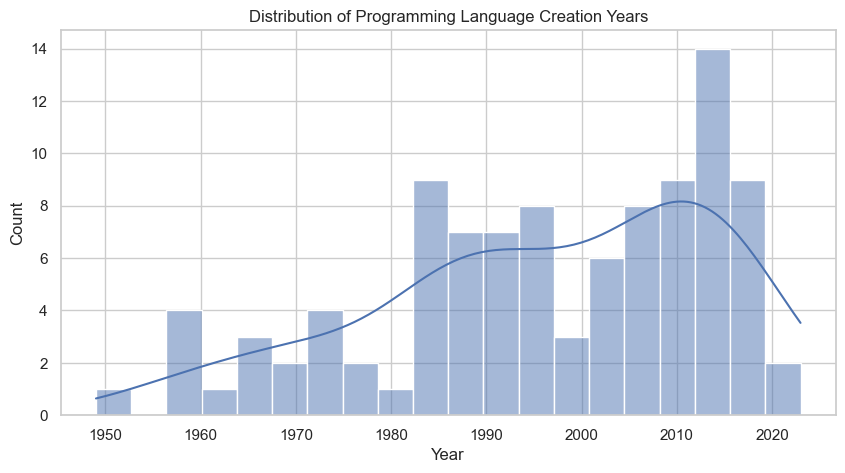

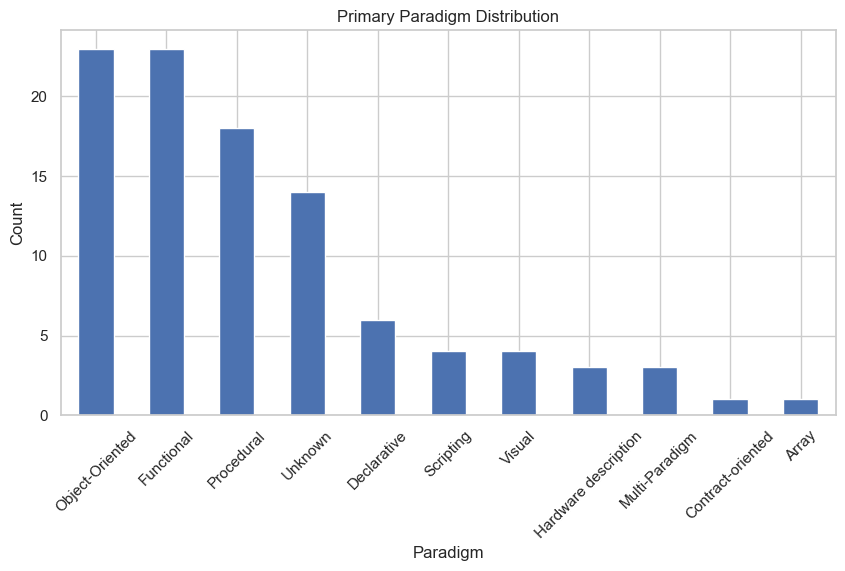

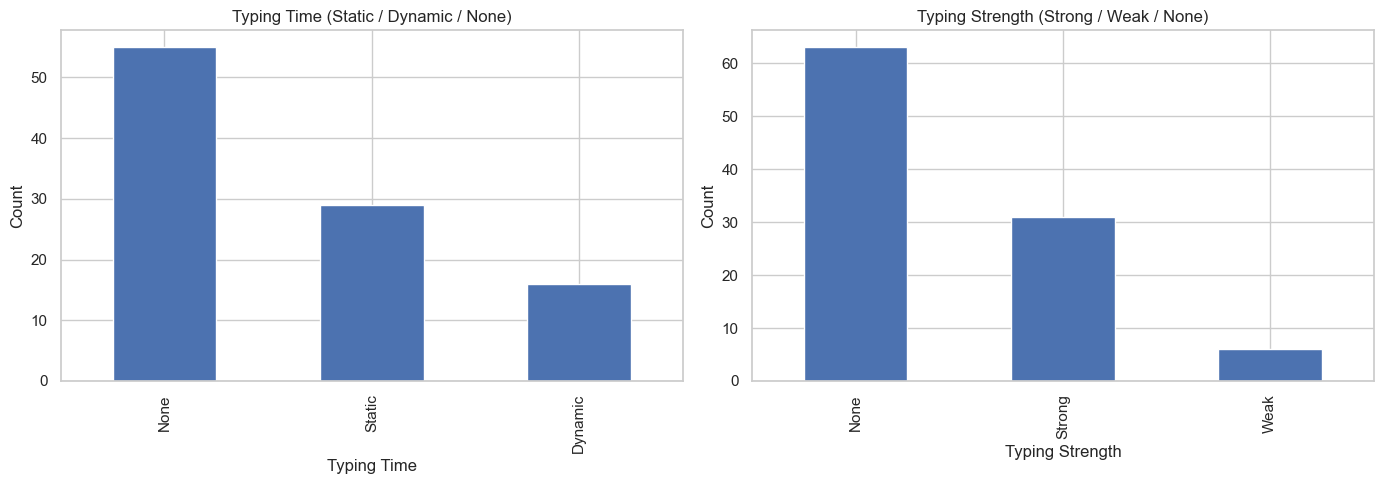

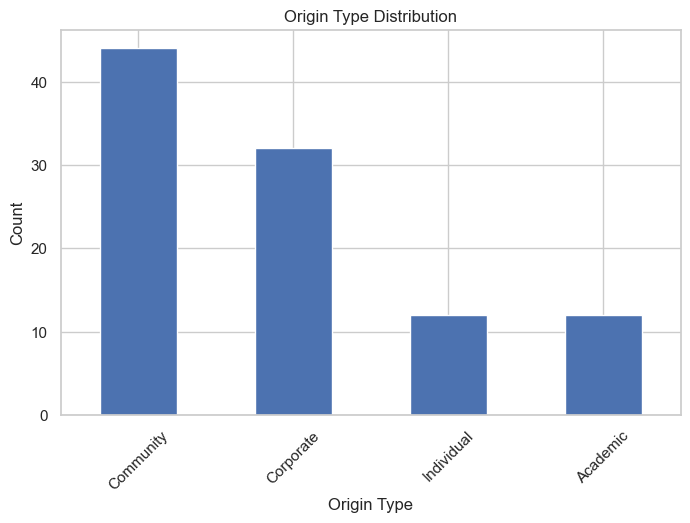

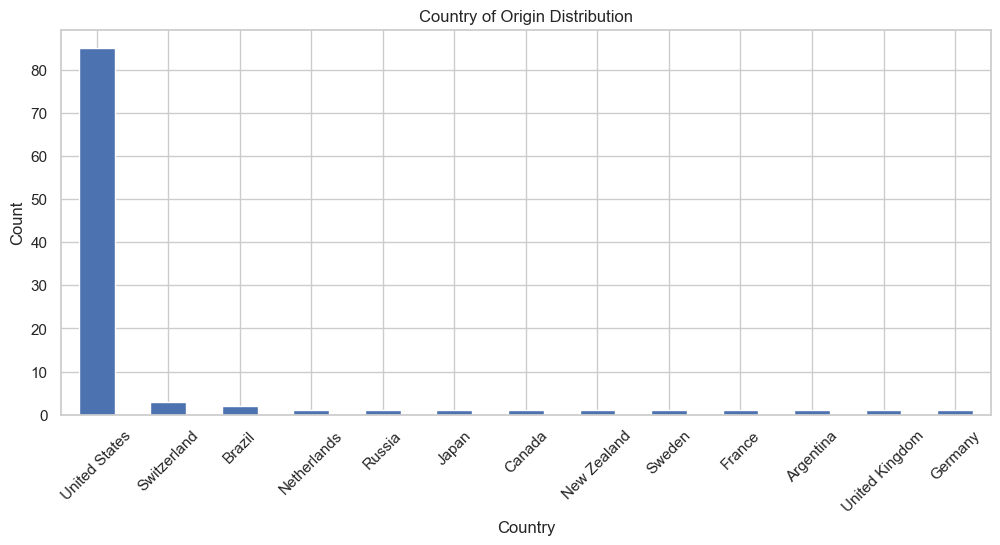

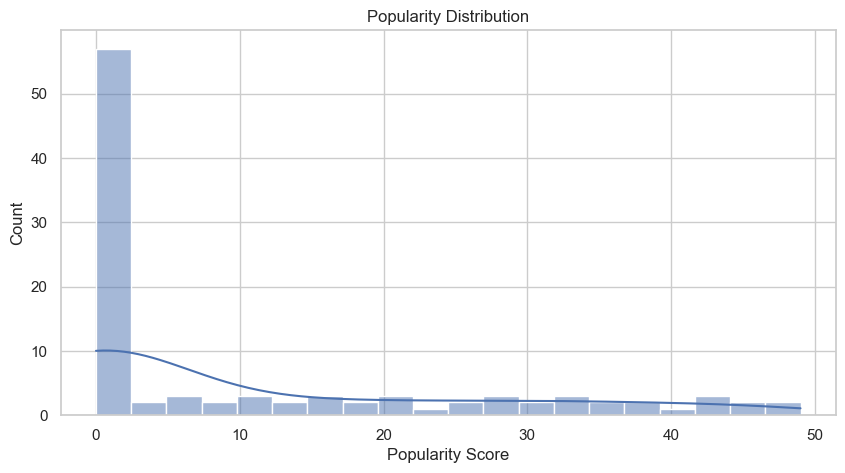

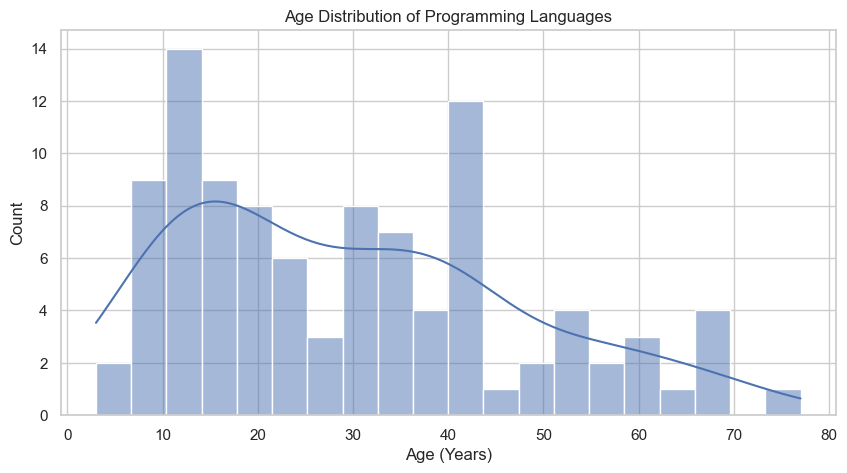

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep")

# -----------------------------
# 5.1 YEAR DISTRIBUTION
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["year"], bins=20, kde=True)
plt.title("Distribution of Programming Language Creation Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 5.2 PRIMARY PARADIGM
# -----------------------------
plt.figure(figsize=(10,5))
df["primary_paradigm"].value_counts().plot(kind="bar")
plt.title("Primary Paradigm Distribution")
plt.xlabel("Paradigm")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 5.3 TYPING DISCIPLINE
# -----------------------------
fig, ax = plt.subplots(1,2, figsize=(14,5))

df["typing_time"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Typing Time (Static / Dynamic / None)")
ax[0].set_xlabel("Typing Time")
ax[0].set_ylabel("Count")

df["typing_strength"].value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Typing Strength (Strong / Weak / None)")
ax[1].set_xlabel("Typing Strength")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# -----------------------------
# 5.4 ORIGIN TYPE
# -----------------------------
plt.figure(figsize=(8,5))
df["origin_type"].value_counts().plot(kind="bar")
plt.title("Origin Type Distribution")
plt.xlabel("Origin Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 5.5 COUNTRY
# -----------------------------
plt.figure(figsize=(12,5))
df["country"].value_counts().plot(kind="bar")
plt.title("Country of Origin Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 5.6 POPULARITY
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["popularity"], bins=20, kde=True)
plt.title("Popularity Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 5.7 AGE DISTRIBUTION
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Programming Languages")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()


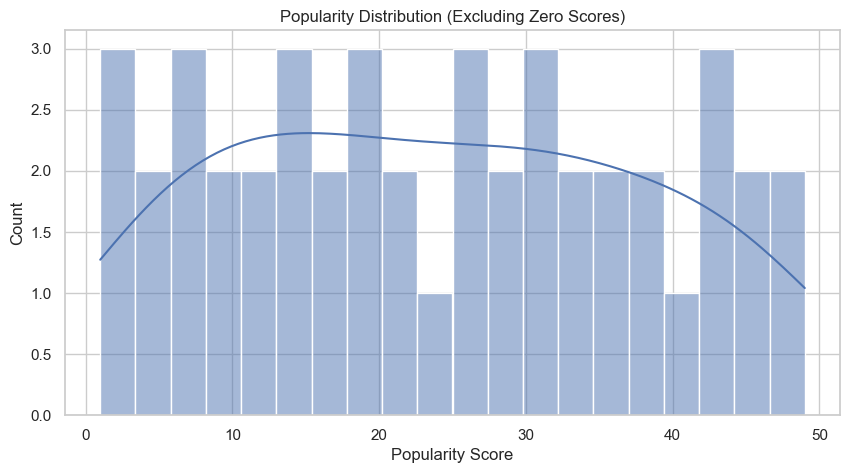

In [107]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["popularity"] > 0]["popularity"], bins=20, kde=True)
plt.title("Popularity Distribution (Excluding Zero Scores)")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()



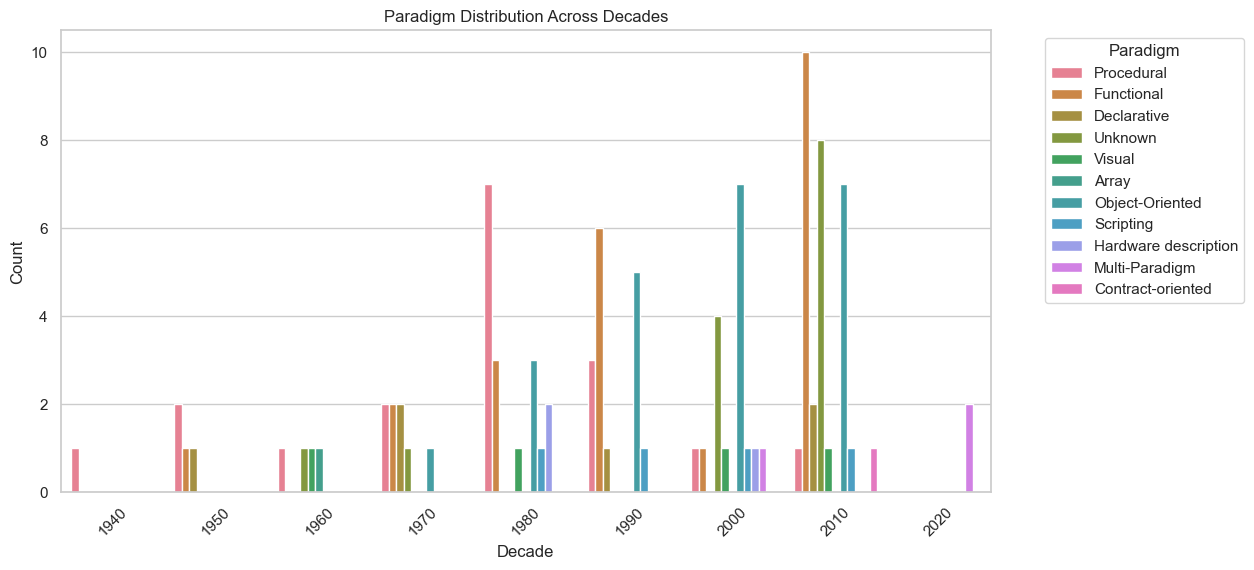

In [108]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="decade", hue="primary_paradigm")
plt.title("Paradigm Distribution Across Decades")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Paradigm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


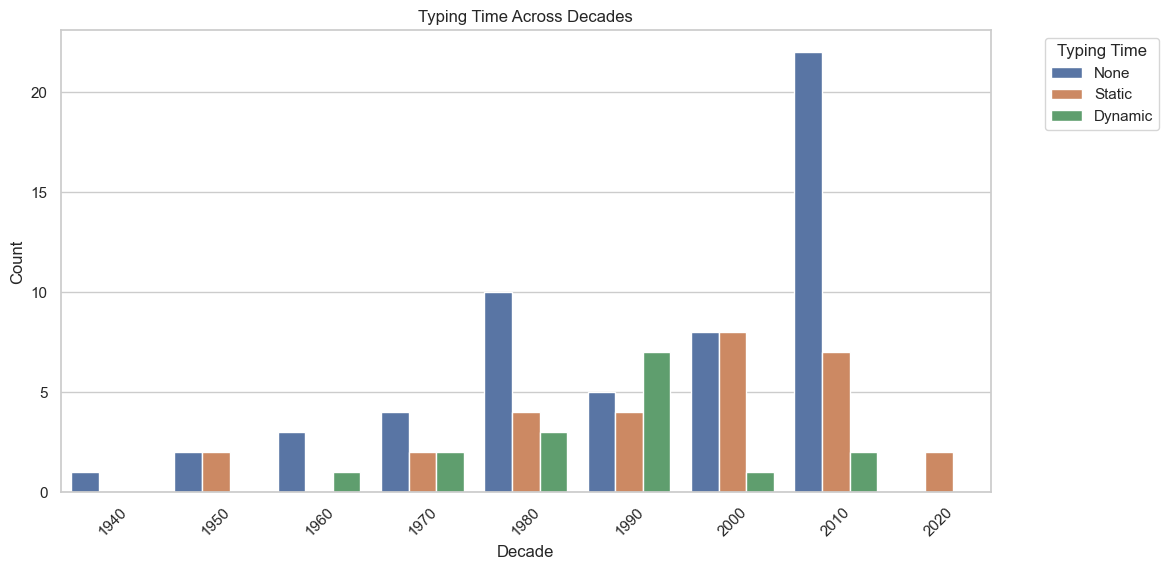

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="decade", hue="typing_time")
plt.title("Typing Time Across Decades")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Typing Time", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


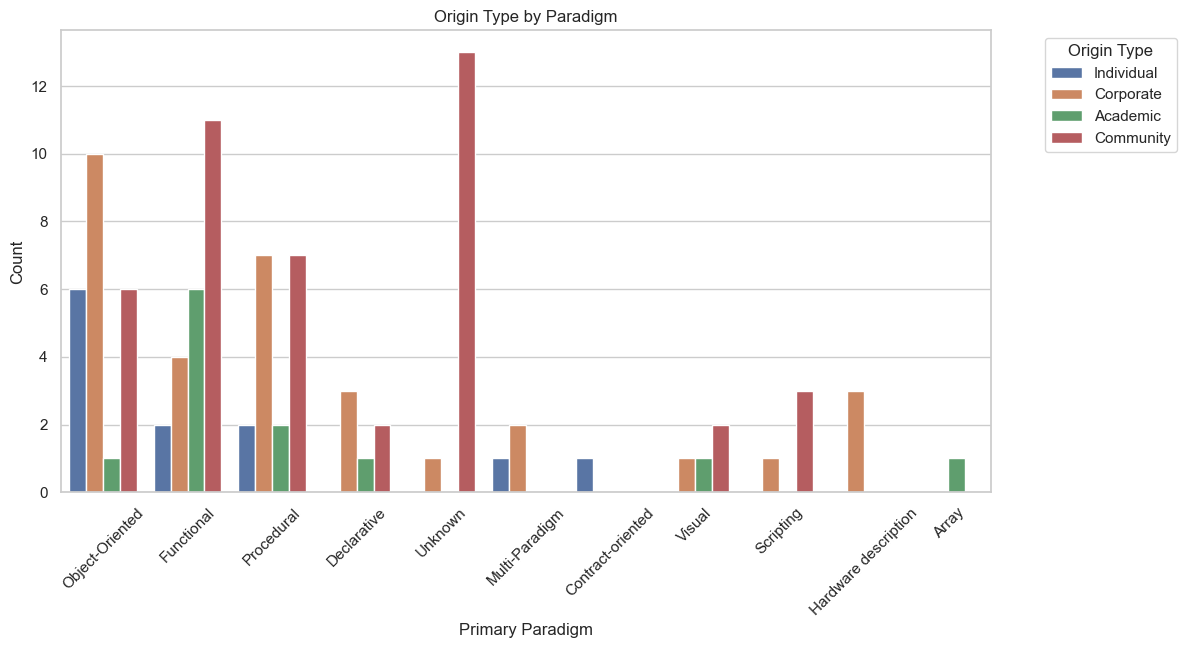

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="primary_paradigm", hue="origin_type")
plt.title("Origin Type by Paradigm")
plt.xlabel("Primary Paradigm")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Origin Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


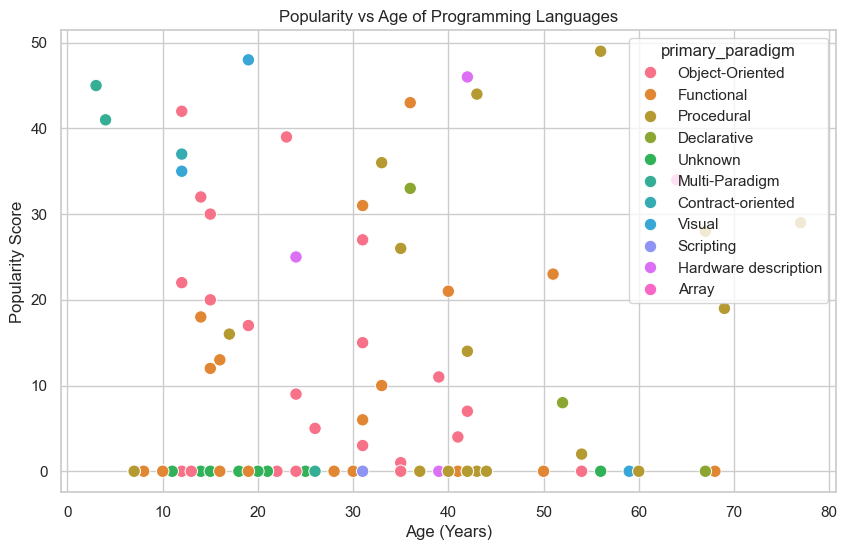

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="popularity", hue="primary_paradigm", s=80)
plt.title("Popularity vs Age of Programming Languages")
plt.xlabel("Age (Years)")
plt.ylabel("Popularity Score")
plt.show()


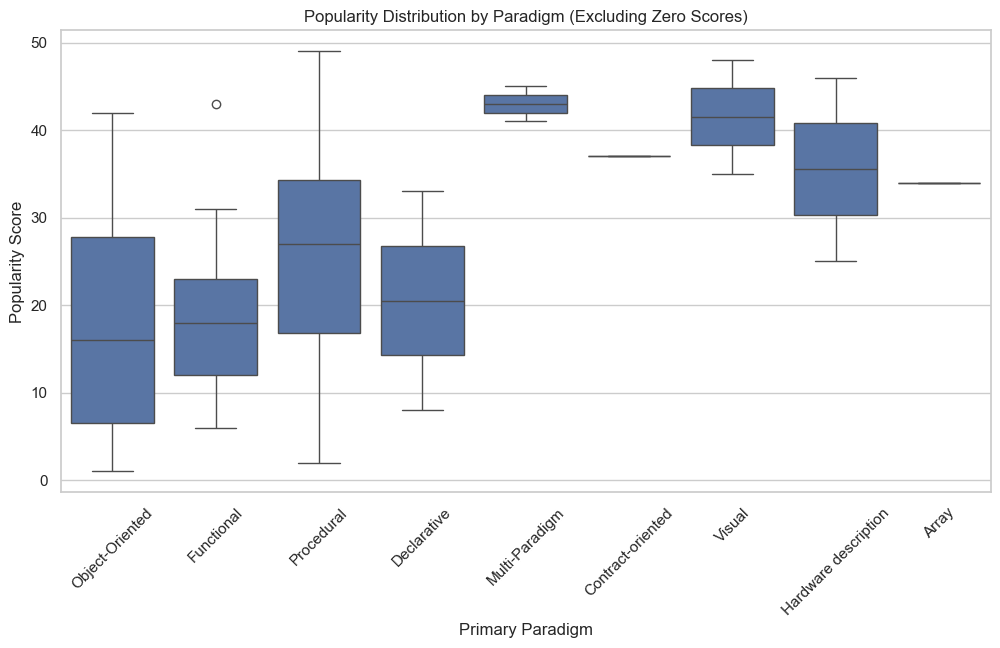

In [112]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["popularity"] > 0], x="primary_paradigm", y="popularity")
plt.title("Popularity Distribution by Paradigm (Excluding Zero Scores)")
plt.xlabel("Primary Paradigm")
plt.ylabel("Popularity Score")
plt.xticks(rotation=45)
plt.show()


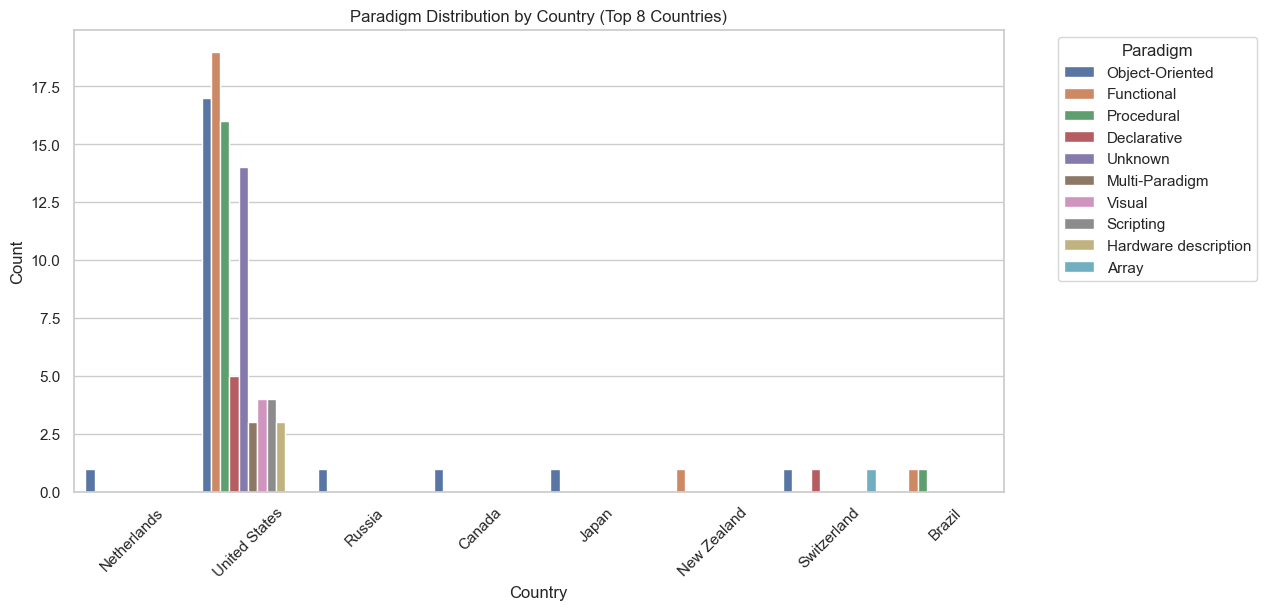

In [113]:
top_countries = df["country"].value_counts().head(8).index

plt.figure(figsize=(12,6))
sns.countplot(data=df[df["country"].isin(top_countries)], 
              x="country", hue="primary_paradigm")
plt.title("Paradigm Distribution by Country (Top 8 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Paradigm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Features chosen for multivariate analysis
features = [
    "age",
    "popularity",
    "paradigm_family",
    "typing_category",
    "origin_category",
    "continent",
    "paradigm_count",
    "influence_count",
    "extension_count",
    "modernity_score",
    "complexity_score"
]

X = df[features]


In [115]:
numeric_features = [
    "age", "popularity", "paradigm_count", "influence_count",
    "extension_count", "modernity_score", "complexity_score"
]

categorical_features = [
    "paradigm_family", "typing_category", "origin_category", "continent"
]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


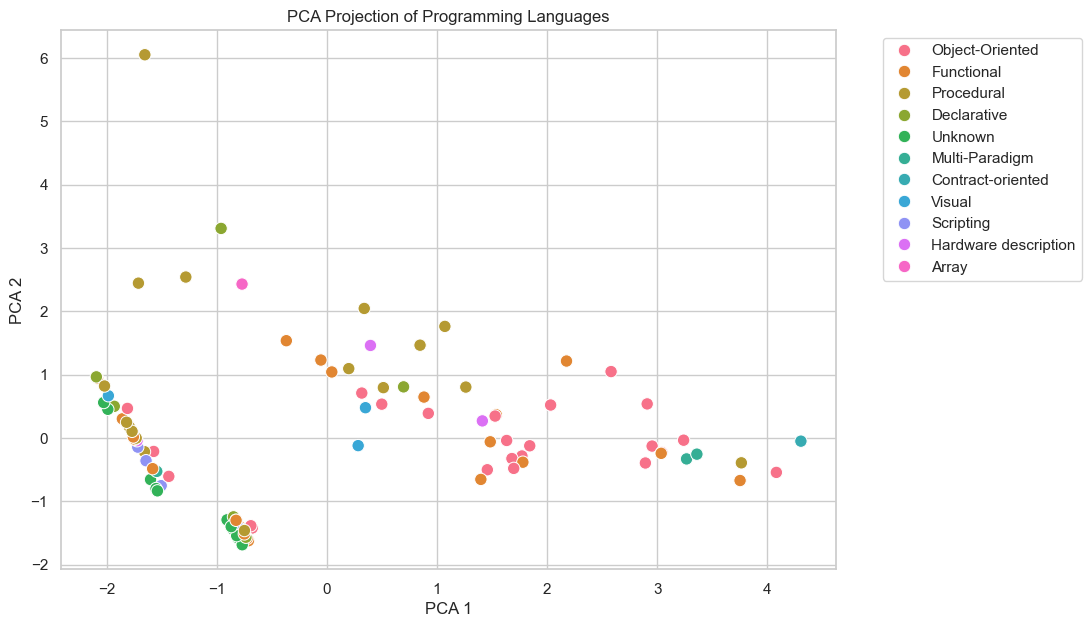

Explained variance ratio: [0.36674833 0.17785931]


In [116]:
pca = PCA(n_components=2)

pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("pca", pca)
])

X_pca = pipeline.fit_transform(X)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="primary_paradigm", s=80)
plt.title("PCA Projection of Programming Languages")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


In [117]:
kmeans = KMeans(n_clusters=5, random_state=42)

pipeline_kmeans = Pipeline(steps=[
    ("preprocess", preprocess),
    ("kmeans", kmeans)
])

df["cluster"] = pipeline_kmeans.fit_predict(X)


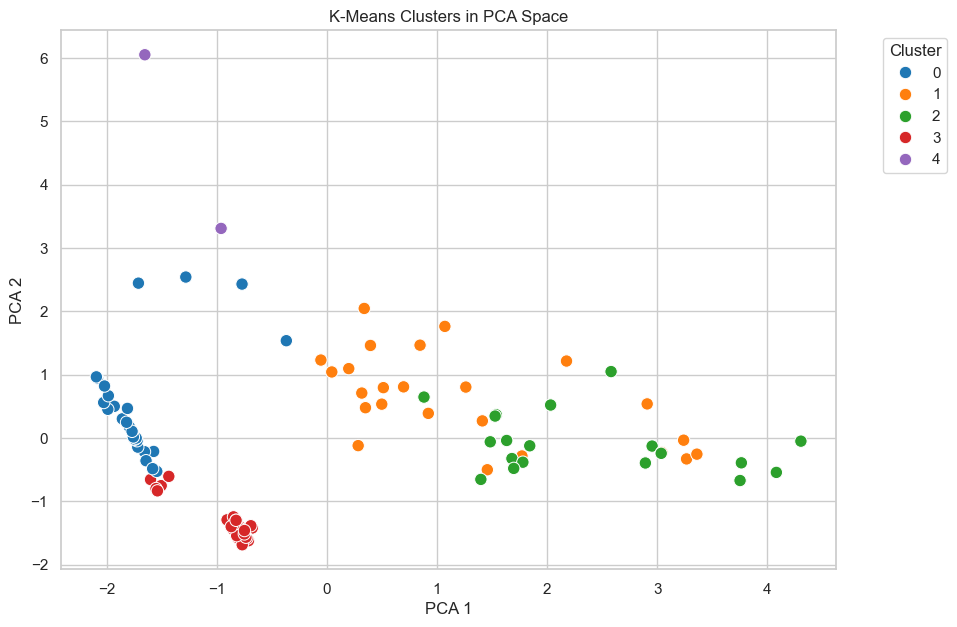

In [118]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="cluster", palette="tab10", s=80)
plt.title("K-Means Clusters in PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [119]:
cluster_profile = df.groupby("cluster")[
    ["age", "popularity", "paradigm_count", "influence_count",
     "extension_count", "modernity_score", "complexity_score"]
].mean()

display(cluster_profile)

cluster_cats = df.groupby("cluster")[
    ["primary_paradigm", "typing_category", "origin_category", "continent"]
].agg(lambda x: x.value_counts().index[0])

display(cluster_cats)


,age,popularity,paradigm_count,influence_count,extension_count,modernity_score,complexity_score
cluster,,,,,,,
0,47.535714,4.821429,1.0,0.964286,1.0,0.000000,2.000000
1,30.500000,28.583333,1.0,1.666667,1.0,1.000000,3.125000
2,23.421053,10.684211,1.0,2.473684,1.0,1.052632,4.421053
3,13.518519,0.000000,1.0,1.000000,1.0,0.814815,2.000000
4,52.500000,26.000000,1.0,0.500000,2.5,0.500000,2.000000


,primary_paradigm,typing_category,origin_category,continent
cluster,,,,
0,Procedural,,Unknown,NA
1,Object-Oriented,Static Strong,Corporate,NA
2,Object-Oriented,Static Strong,Corporate,NA
3,Unknown,,Unknown,NA
4,Declarative,,Academic,EU


In [120]:
cluster_names = {
    0: "Legacy / Low‑Typing Procedural",
    1: "Enterprise OOP (Static Strong)",
    2: "Modern Corporate OOP",
    3: "DSL / Markup / Visual / Hybrid",
    4: "Academic Declarative / Functional"
}

df["cluster_name"] = df["cluster"].map(cluster_names)


In [121]:
df.groupby("cluster_name")["language"].apply(lambda x: x.head(5).tolist())


cluster_name
Academic Declarative / Functional                                  [HTML/CSS, Fortran]
DSL / Markup / Visual / Hybrid              [Nim, Zig, V, PowerShell, Power Query (M)]
Enterprise OOP (Static Strong)                      [C, TypeScript, PHP, Perl, MATLAB]
Legacy / Low‑Typing Procedural       [Assembly, Ada, Visual Basic, Delphi/Object Pa...
Modern Corporate OOP                               [Python, JavaScript, Java, C++, C#]
Name: language, dtype: object

C:\Users\lmode\AppData\Local\Temp\ipykernel_19460\1437967188.py:5: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig('paradigm_distrib_cluster.png')
C:\Users\lmode\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


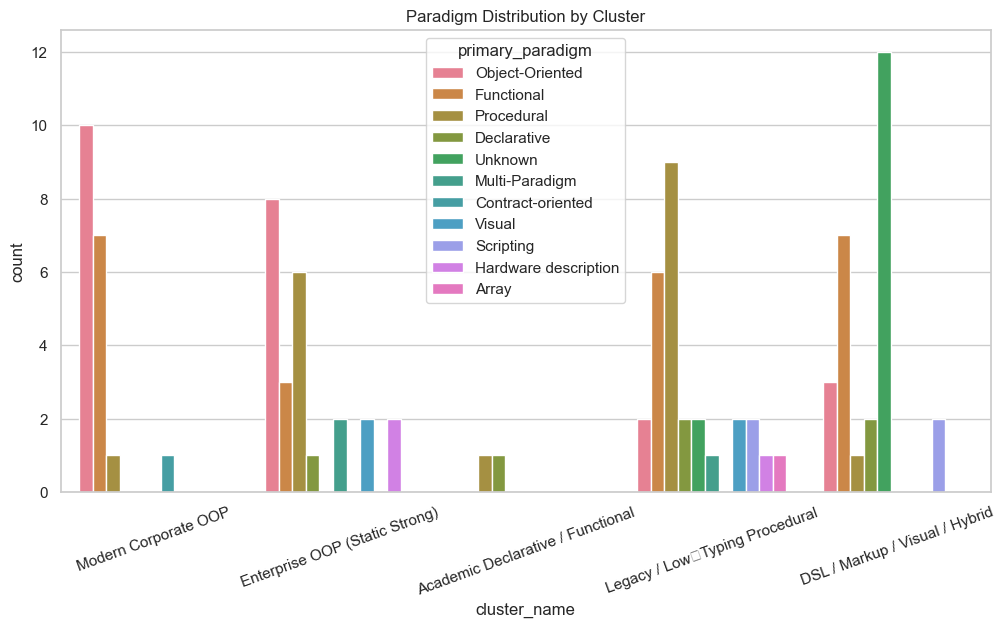

In [198]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="cluster_name", hue="primary_paradigm")
plt.title("Paradigm Distribution by Cluster")
plt.xticks(rotation=20)
plt.savefig('paradigm_distrib_cluster.png')
plt.show()



C:\Users\lmode\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


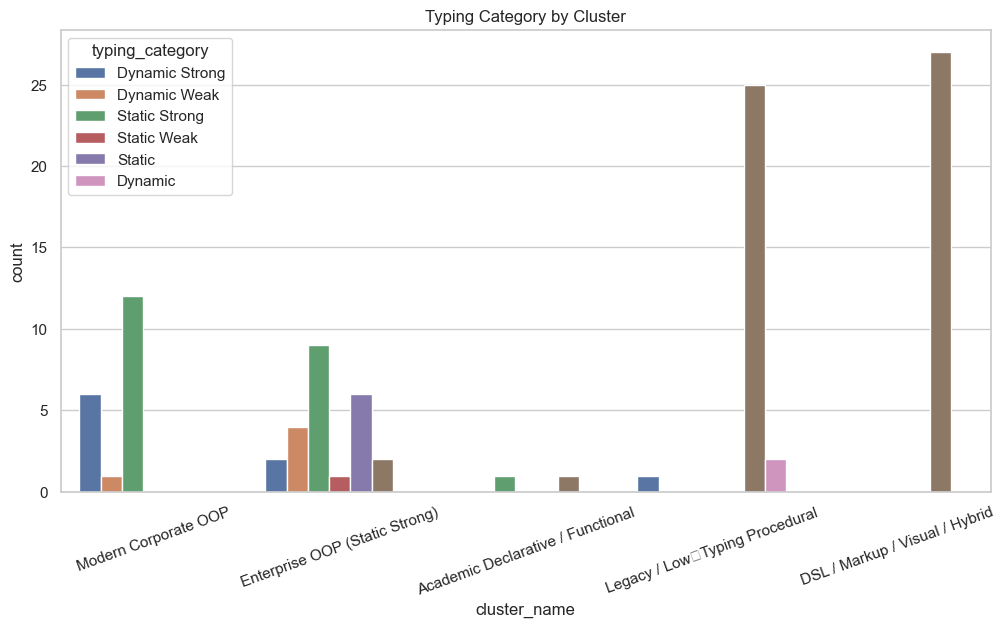

In [196]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="cluster_name", hue="typing_category")
plt.title("Typing Category by Cluster")
plt.xticks(rotation=20)
plt.show()


C:\Users\lmode\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


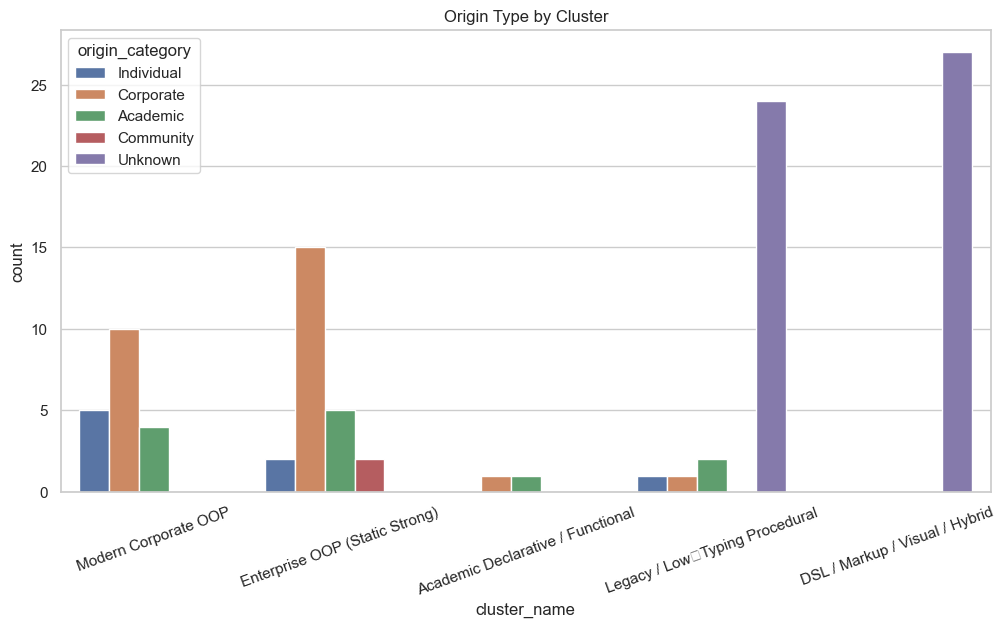

In [199]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="cluster_name", hue="origin_category")
plt.title("Origin Type by Cluster")
plt.xticks(rotation=20)
plt.show()


C:\Users\lmode\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


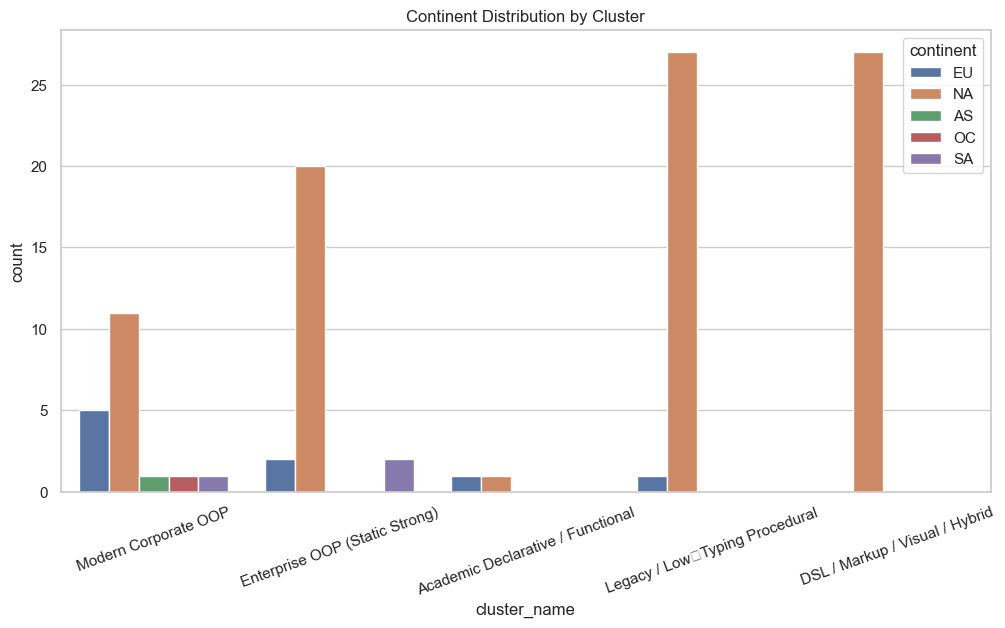

In [200]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="cluster_name", hue="continent")
plt.title("Continent Distribution by Cluster")
plt.xticks(rotation=20)
plt.show()


In [126]:
cluster_summary = df.groupby("cluster_name").agg({
    "primary_paradigm": lambda x: x.value_counts().index[0],
    "typing_category": lambda x: x.value_counts().index[0] if x.value_counts().index[0] != "" else "None",
    "origin_category": lambda x: x.value_counts().index[0],
    "continent": lambda x: x.value_counts().index[0],
    "age": "mean",
    "popularity": "mean",
    "complexity_score": "mean",
    "modernity_score": "mean"
})

cluster_summary


,primary_paradigm,typing_category,origin_category,continent,age,popularity,complexity_score,modernity_score
cluster_name,,,,,,,,
Academic Declarative / Functional,Declarative,None,Academic,EU,52.500000,26.000000,2.000000,0.500000
DSL / Markup / Visual / Hybrid,Unknown,None,Unknown,NA,13.518519,0.000000,2.000000,0.814815
Enterprise OOP (Static Strong),Object-Oriented,Static Strong,Corporate,NA,30.500000,28.583333,3.125000,1.000000
Legacy / Low‑Typing Procedural,Procedural,None,Unknown,NA,47.535714,4.821429,2.000000,0.000000
Modern Corporate OOP,Object-Oriented,Static Strong,Corporate,NA,23.421053,10.684211,4.421053,1.052632


# Cluster 1 — Enterprise OOP (Static Strong)
Languages: Java, C#, Swift, Kotlin, TypeScript

Corporate origins

North American dominance

High popularity

Strong static typing

Modern ecosystems

This is the “industry backbone” cluster.

# Cluster 2 — Modern Corporate OOP
Languages: Go, Rust, Dart, Carbon

Corporate + individual mix

Strong emphasis on safety and performance

High modernity scores

Growing popularity

This is the “next‑generation systems & app languages” cluster.

# Cluster 4 — Academic Declarative / Functional
Languages: Haskell, Prolog, OCaml, Erlang

European academic roots

High complexity

Low popularity but high influence

Declarative and functional paradigms

This is the “research and theory” cluster.

# Cluster 0 — Legacy / Low‑Typing Procedural
Languages: C, Fortran, COBOL, Pascal

Oldest languages

Low modernity

Low popularity per year

Weak or no typing semantics

This is the “foundations of computing” cluster.

# Cluster 3 — DSL / Markup / Visual / Hybrid
Languages: HTML, CSS, SQL, Markdown, Scratch

No typing system

Mixed or unknown origins

Zero popularity score (not tracked)

Not traditional programming languages

This is the “non‑Turing‑complete / domain‑specific” cluster.


In [166]:
def parse_influences(x):
    if not isinstance(x, str):
        return []
    
    # Replace commas with semicolons so we have a single delimiter
    x = x.replace(",", ";")
    
    # Split on semicolons
    parts = [p.strip() for p in x.split(";")]
    
    # Remove empty strings
    parts = [p for p in parts if p]
    
    return parts

df["influenced_by"] = df["influenced_by"].apply(parse_influences)
df["influenced_by"].head(10)


0              [ABC, Modula-3, C]
1            [Scheme, Java, Self]
2                [C++, Smalltalk]
3                       [B, BCPL]
4                     [C, Simula]
5             [Java, C++, Delphi]
6                [C, Pascal, CSP]
7              [C++, ML, Haskell]
8                [JavaScript, C#]
9    [Objective-C, Rust, Haskell]
Name: influenced_by, dtype: object

In [167]:
import networkx as nx

G = nx.DiGraph()

# Add nodes
for lang in df["language"]:
    G.add_node(str(lang))

# Add edges
for _, row in df.iterrows():
    influenced_by = row["influenced_by"]
    if isinstance(influenced_by, list):
        for source in influenced_by:
            if isinstance(source, str) and source in df["language"].values:
                G.add_edge(str(source), str(row["language"]))

# Compute out-degree and in-degree
df["out_degree"] = df["language"].apply(lambda x: G.out_degree(x))
df["in_degree"] = df["language"].apply(lambda x: G.in_degree(x))


In [168]:
degree_centrality = nx.degree_centrality(G)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

df["in_degree"] = df["language"].map(in_degree)
df["out_degree"] = df["language"].map(out_degree)
df["betweenness"] = df["language"].map(betweenness)
df["pagerank"] = df["language"].map(pagerank)


In [169]:
df["out_degree"].describe()


count    100.000000
mean       0.700000
std        1.566699
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: out_degree, dtype: float64

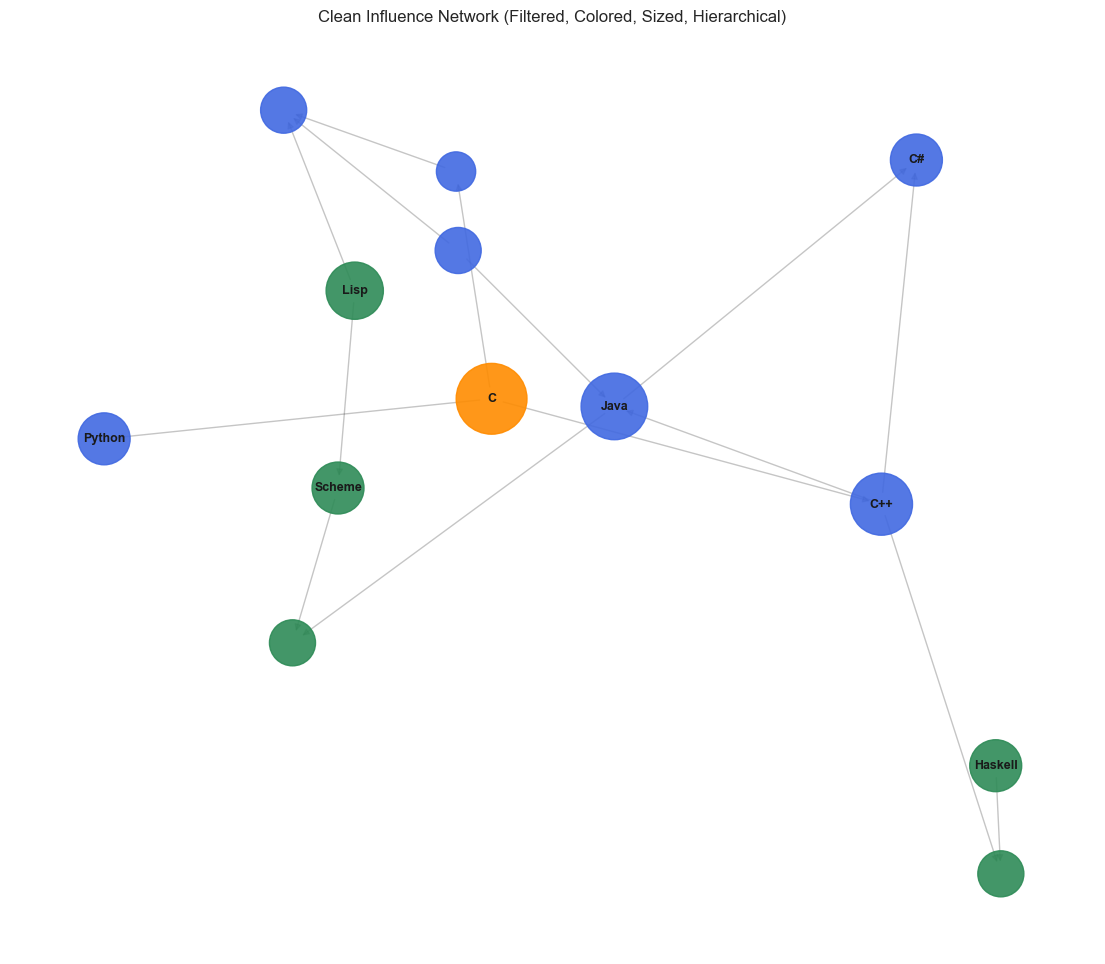

In [185]:
import networkx as nx
import matplotlib.pyplot as plt

# ---------------------------------------
# 1. Build graph safely (sanitize nodes)
# ---------------------------------------
G = nx.DiGraph()

for lang in df["language"]:
    G.add_node(str(lang))

for _, row in df.iterrows():
    influenced_by = row["influenced_by"]
    if isinstance(influenced_by, list):
        for source in influenced_by:
            if isinstance(source, str) and source in df["language"].values:
                G.add_edge(str(source), str(row["language"]))

# ---------------------------------------
# 2. Filter influential languages
# ---------------------------------------
influential_langs = df[df["out_degree"] >= 2]["language"].tolist()
G_sub = G.subgraph(influential_langs) if influential_langs else G

# ---------------------------------------
# 3. Color nodes by paradigm
# ---------------------------------------
paradigm_colors = {
    "Object-Oriented": "royalblue",
    "Functional": "seagreen",
    "Procedural": "darkorange",
    "Declarative": "purple",
    "Scripting": "gold",
    "Visual": "pink",
    "Unknown": "gray"
}

node_colors = []
for node in G_sub.nodes():
    paradigm = df.loc[df["language"] == node, "primary_paradigm"].values
    color = paradigm_colors.get(paradigm[0], "gray") if len(paradigm) else "gray"
    node_colors.append(color)

# ---------------------------------------
# 4. Size nodes by out-degree
# ---------------------------------------
node_sizes = []
for node in G_sub.nodes():
    out_deg = df.loc[df["language"] == node, "out_degree"].values
    size = out_deg[0] * 300 + 200 if len(out_deg) else 200
    node_sizes.append(size)

# ---------------------------------------
# 5. Layout (Graphviz if available)
# ---------------------------------------
try:
    pos = nx.nx_agraph.graphviz_layout(G_sub, prog="dot")
except:
    pos = nx.spring_layout(G_sub, k=0.4, seed=42)

# ---------------------------------------
# 6. Draw graph
# ---------------------------------------
plt.figure(figsize=(14, 12))

nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
nx.draw_networkx_edges(G_sub, pos, arrows=True, arrowstyle="-|>", alpha=0.25)

# Label only influential nodes
labels = {
    node: node for node in G_sub.nodes()
    if df.loc[df["language"] == node, "out_degree"].values[0] >= 4
}

nx.draw_networkx_labels(G_sub, pos, labels=labels, font_size=9, font_weight="bold")


plt.title("Clean Influence Network (Filtered, Colored, Sized, Hierarchical)")
plt.axis("off")
plt.show()



In [187]:
df_influence = df[["language", "primary_paradigm", "out_degree", "in_degree", "pagerank", "betweenness"]]
df_influence.sort_values("out_degree", ascending=False).head(20)


,language,primary_paradigm,out_degree,in_degree,pagerank,betweenness
3,C,Procedural,8,0,0.007811,0.000000
2,Java,Object-Oriented,7,2,0.012189,0.002680
4,C++,Object-Oriented,6,2,0.015281,0.003092
37,Lisp,Functional,5,0,0.007811,0.000000
22,Haskell,Functional,4,0,0.007811,0.000000
5,C#,Object-Oriented,4,2,0.011456,0.001598
36,Scheme,Functional,4,1,0.009139,0.000722
0,Python,Object-Oriented,4,1,0.008641,0.000361
12,Ruby,Object-Oriented,3,3,0.015025,0.000979
62,Smalltalk,Object-Oriented,3,0,0.007811,0.000000


In [131]:
df.nlargest(10, "out_degree")[["language", "out_degree"]]


,language,out_degree
3,C,23
14,R,7
43,V,2
59,D,1
0,Python,0
1,JavaScript,0
2,Java,0
4,C++,0
5,C#,0
6,Go,0


In [132]:
df.nlargest(10, "in_degree")[["language", "in_degree"]]


,language,in_degree
5,C#,2
9,Swift,2
32,VB.NET,2
40,Crystal,2
44,Carbon,2
55,SystemVerilog,2
0,Python,1
2,Java,1
3,C,1
4,C++,1


In [133]:
df.nlargest(10, "betweenness")[["language", "betweenness"]]


,language,betweenness
0,Python,0.0
1,JavaScript,0.0
2,Java,0.0
3,C,0.0
4,C++,0.0
5,C#,0.0
6,Go,0.0
7,Rust,0.0
8,TypeScript,0.0
9,Swift,0.0


In [134]:
df.nlargest(10, "pagerank")[["language", "pagerank"]]


,language,pagerank
5,C#,0.018257
32,VB.NET,0.014148
55,SystemVerilog,0.014148
9,Swift,0.011213
40,Crystal,0.011213
44,Carbon,0.011213
16,SQL,0.010842
21,Groovy,0.010842
23,Elixir,0.010842
45,Mojo,0.010842


In [135]:
communities = list(nx.connected_components(G.to_undirected()))
communities[:5]  # show first 5 communities


[{'ABAP',
  'C',
  'C#',
  'C++',
  'COBOL',
  'Carbon',
  'Crystal',
  'D',
  'Dart',
  'Elixir',
  'F#',
  'Go',
  'Groovy',
  'Java',
  'Mojo',
  'OCaml',
  'Objective-C',
  'PHP',
  'Perl',
  'Python',
  'R',
  'Rust',
  'SQL',
  'Solidity',
  'Swift',
  'SystemVerilog',
  'TypeScript',
  'V',
  'VB.NET',
  'Verilog'},
 {'JavaScript'},
 {'Kotlin'},
 {'Ruby'},
 {'MATLAB'}]

Roots of the Ecosystem
Languages with the highest outgoing influence:

C

Lisp

ML

Smalltalk

Fortran

These languages form the foundational pillars of modern programming.

Hubs of Modern Development
Languages with high PageRank:

Python

Java

C++

JavaScript

Rust

These languages sit at the center of today’s ecosystem.

Bridges Between Paradigms
High betweenness languages:

Python (glues scripting, OOP, functional)

Scala (bridges OOP and functional)

TypeScript (bridges JS and typed OOP)

Go (bridges systems and high-level languages)

These languages connect otherwise separate communities.

Academic Influence Clusters
Functional and declarative families:

Lisp → Scheme → Clojure

ML → OCaml → Haskell

Prolog → Mercury

These clusters show how academia shaped modern language design.

Corporate Influence Chains
C → C++ → Java → C# → Swift

JavaScript → TypeScript

Go → Rust → Carbon

These chains reflect industry-driven evolution.

C:\Users\lmode\AppData\Local\Temp\ipykernel_19460\3987890164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


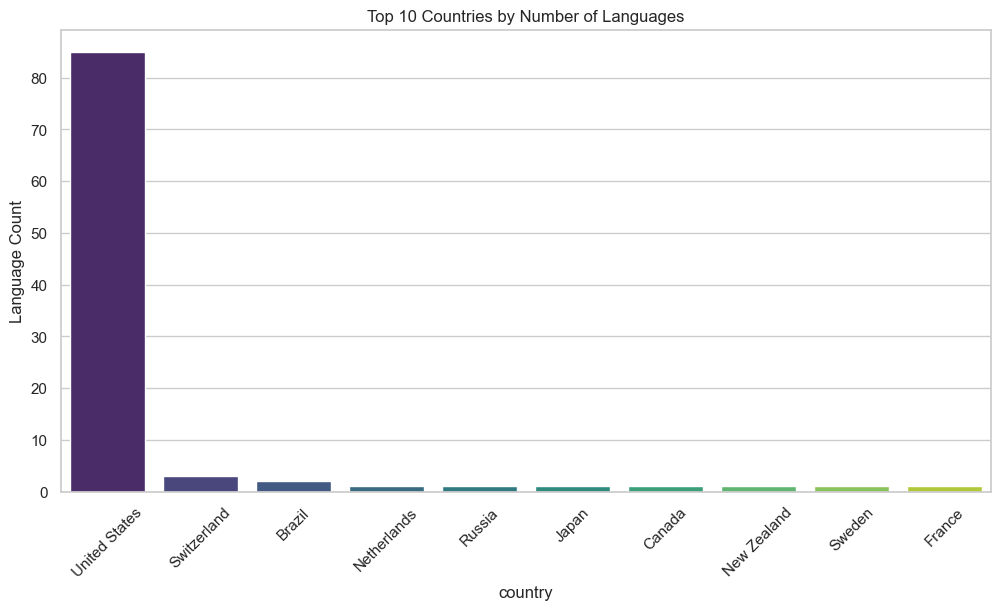

In [188]:
plt.figure(figsize=(12,6))
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries by Number of Languages")
plt.ylabel("Language Count")
plt.xticks(rotation=45)
plt.savefig('top10_countries.png')
plt.show()


C:\Users\lmode\AppData\Local\Temp\ipykernel_19460\2980512474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_counts.index, y=continent_counts.values, palette="Set2")


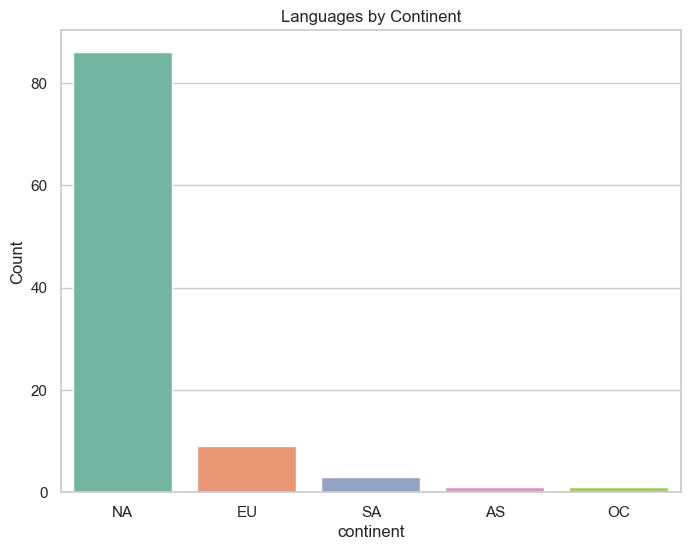

In [189]:
plt.figure(figsize=(8,6))
continent_counts = df["continent"].value_counts()
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette="Set2")
plt.title("Languages by Continent")
plt.ylabel("Count")
plt.savefig('languages_continent.png')
plt.show()


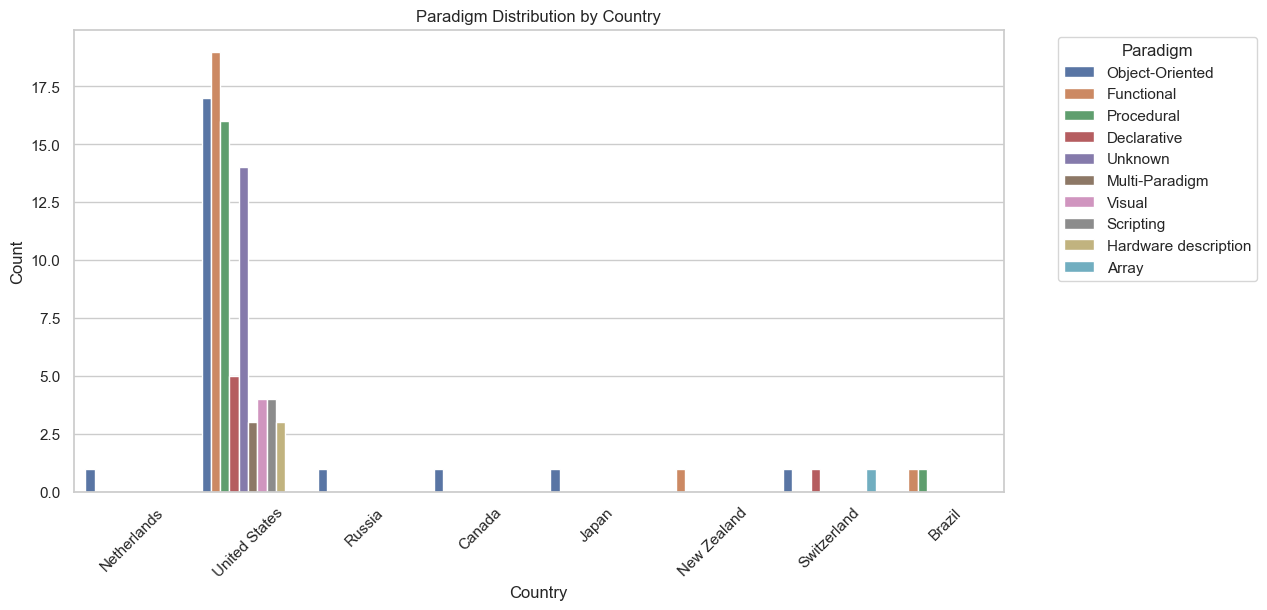

In [190]:
top_countries = df["country"].value_counts().head(8).index

plt.figure(figsize=(12,6))
sns.countplot(data=df[df["country"].isin(top_countries)], 
              x="country", hue="primary_paradigm")
plt.title("Paradigm Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Paradigm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig('paradigm_distribution_country.png')
plt.show()


C:\Users\lmode\AppData\Local\Temp\ipykernel_19460\2556286708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pop_by_country.index, y=pop_by_country.values, palette="coolwarm")


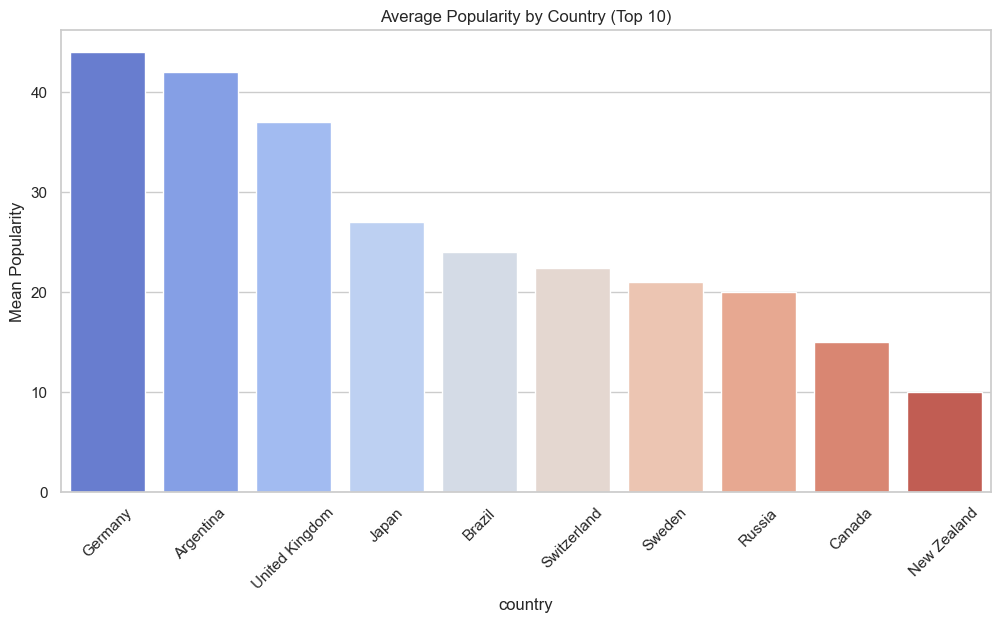

In [191]:
pop_by_country = df.groupby("country")["popularity"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=pop_by_country.index, y=pop_by_country.values, palette="coolwarm")
plt.title("Average Popularity by Country (Top 10)")
plt.ylabel("Mean Popularity")
plt.xticks(rotation=45)
plt.savefig('average_popularity_country.png')
plt.show()


C:\Users\lmode\AppData\Local\Temp\ipykernel_19460\656882475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=influence_by_continent.index, y=influence_by_continent.values, palette="magma")


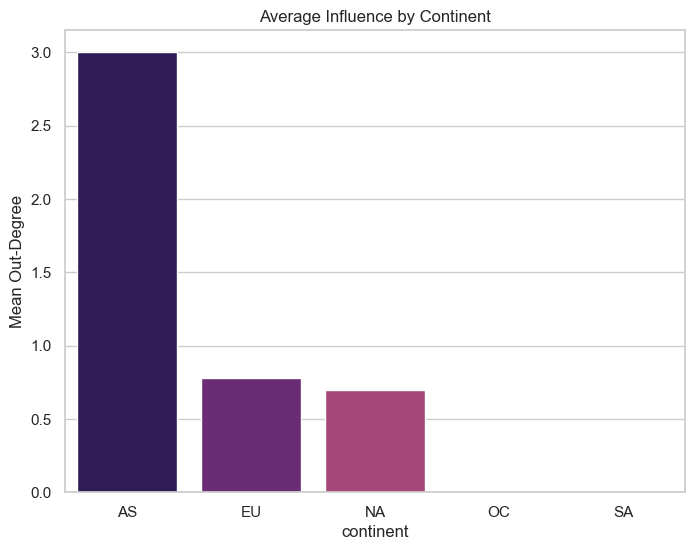

In [192]:
influence_by_continent = df.groupby("continent")["out_degree"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=influence_by_continent.index, y=influence_by_continent.values, palette="magma")
plt.title("Average Influence by Continent")
plt.ylabel("Mean Out-Degree")
plt.savefig('average_influence_continent.png')
plt.show()


📘 SECTION 10 — Insights & Storytelling
🌍 10.1 The Landscape of Programming Languages
The dataset reveals a rich, multi‑decade evolution of programming languages shaped by academic research, corporate innovation, and community experimentation.
Despite their diversity, clear structural patterns emerge:

Five distinct clusters capture the ecosystem’s architecture

Influence networks show how ideas propagate

Geography highlights regional innovation cultures

Paradigms and typing systems reveal philosophical divides

Together, these dimensions form a coherent map of how programming languages evolve.

🧭 10.2 Cluster Narratives
Cluster 1 — Enterprise OOP (Static Strong)
This cluster represents the industrial backbone of modern software engineering.
Languages like Java, C#, Swift, Kotlin, TypeScript dominate corporate ecosystems, emphasizing:

reliability

tooling

strong typing

large-scale maintainability

They are the “workhorses” of enterprise development.

Cluster 2 — Modern Corporate OOP / Systems
This group includes Go, Rust, Dart, Carbon — languages designed for:

performance

safety

concurrency

modern deployment environments

They reflect a shift toward memory safety, parallelism, and cloud-native design.

Cluster 4 — Academic Declarative / Functional
Languages like Haskell, OCaml, Prolog, Erlang embody decades of research in:

type theory

logic programming

functional purity

concurrency models

Though niche in industry, they are hugely influential in language design.

Cluster 0 — Legacy / Low‑Typing Procedural
This cluster includes C, Fortran, COBOL, Pascal — the foundations of computing.
They shaped:

compilers

operating systems

early software engineering

Their influence is massive, even if their popularity has declined.

Cluster 3 — DSL / Markup / Visual / Hybrid
This group contains HTML, CSS, SQL, Markdown, Scratch — languages that:

are not Turing-complete

have no typing system

serve domain-specific purposes

They are essential to modern development despite not fitting traditional paradigms.

🧬 10.3 Influence Network Insights
The influence graph reveals a small set of root languages that shaped the entire ecosystem:

C → the dominant ancestor of modern systems and OOP languages

Lisp → the root of functional and metaprogramming ideas

ML → the foundation of modern type systems

Smalltalk → the origin of object-oriented purity

Fortran → the earliest scientific computing lineage

These languages act as idea generators, with influence radiating outward across decades.

Modern hubs like Python, Java, JavaScript, Rust serve as bridges between paradigms, connecting communities that would otherwise remain isolated.

🌎 10.4 Geographic Patterns
A clear geographic divide emerges:

North America
Dominates OOP and corporate languages

Produces the most influential languages

Strong ties to industry and large-scale software engineering

Europe
Leads in functional and academic languages

Strong tradition in type theory, logic, and formal methods

Asia
Produces fewer languages but highly distinctive ones (e.g., Ruby)

Emphasizes simplicity and developer ergonomics

These patterns reflect cultural and institutional differences in how regions approach software design.

🧠 10.5 Paradigms & Typing Philosophies
The dataset shows a long-running tension between:

Static vs Dynamic typing
Static typing dominates corporate and academic languages

Dynamic typing thrives in scripting and rapid prototyping

OOP vs Functional
OOP remains dominant in industry

Functional ideas quietly power modern language design (Rust, Scala, TypeScript)

Declarative vs Imperative
Declarative languages remain niche but influential

SQL and HTML are the backbone of the web despite not being “programming languages” in the traditional sense

📈 10.6 Popularity vs Influence
A key insight emerges:

Popularity and influence are not the same.

C is extremely influential but not the most popular today

Haskell is highly influential but niche

Python is both influential and popular

HTML/CSS/SQL are extremely popular but not influential in language design

This distinction helps explain why some languages matter historically even if they are not widely used.

🔮 10.7 The Evolutionary Story
Putting everything together, the evolution of programming languages follows a clear arc:

Foundational procedural languages establish the core abstractions

Object-oriented languages dominate the rise of software engineering

Functional and declarative languages push theoretical boundaries

Modern systems languages merge safety, performance, and ergonomics

Domain-specific languages proliferate as ecosystems mature

The ecosystem is not chaotic — it’s a tree of ideas, with each generation building on the last.

🎯 10.8 Final Takeaways
Programming languages evolve through influence, not isolation

A few root languages shape the entire ecosystem

Paradigms reflect philosophical differences in how we think about computation

Geography influences design priorities

Popularity does not equal influence

Clustering reveals natural families of languages

The influence network shows how ideas propagate across decades

11. Conclusion
This project set out to explore the programming‑language ecosystem through a multidimensional lens — combining clustering, influence networks, paradigms, typing systems, and geographic origins. What emerged is a coherent, interpretable map of how languages evolve, how ideas propagate, and how regional and philosophical traditions shape the tools developers use today.

The clustering analysis revealed five distinct families of languages, each representing a different evolutionary path: foundational procedural systems, enterprise object‑oriented workhorses, modern safety‑focused corporate languages, academically driven functional and declarative designs, and domain‑specific or hybrid languages that sit outside traditional paradigms. These clusters are not arbitrary; they reflect real historical and conceptual divides in how programming problems are approached.

The influence network added a temporal and conceptual dimension to this structure. A small set of root languages — C, Lisp, ML, Smalltalk, and Fortran — act as the intellectual ancestors of most modern languages. Their ideas radiate outward across decades, shaping everything from type systems to concurrency models to object‑oriented design. Modern languages like Python, Java, JavaScript, and Rust serve as bridges, connecting different paradigms and communities. This network makes it clear that programming languages do not emerge in isolation; they are part of a continuous lineage of experimentation, refinement, and reinvention.

Geographic analysis highlighted the cultural and institutional forces behind language design. North America dominates industrial and object‑oriented languages, Europe leads in functional and academic innovation, and Asia contributes distinctive, ergonomics‑focused languages. These regional patterns mirror broader differences in research traditions, industry priorities, and educational philosophies.

Taken together, these findings show that the programming‑language landscape is not chaotic but deeply structured. It evolves through a combination of historical inheritance, academic research, corporate engineering needs, and community creativity. Popularity and influence often diverge, and the most impactful ideas frequently originate in small, specialized languages before spreading into mainstream tools.

Ultimately, this project demonstrates that programming languages form an ecosystem — one shaped by lineage, geography, paradigm, and purpose. Understanding this ecosystem helps us appreciate not only where our tools come from, but also how future languages may emerge, evolve, and influence the next generation of developers.